In [101]:
import pandas as pd # For Data  Wrangling Purpose
import numpy as np  # For Basic Computation Libraries
import seaborn as sns # For Visualization Techniques
import matplotlib.pyplot as plt #Ploting Graphes
import warnings               # Filter Warnings
warnings.filterwarnings('ignore')

In [102]:
df =pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [104]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [105]:
df = df.drop(columns = "_c39")

In [106]:
#Checking "?" Mark
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [107]:
df=df.replace('?',np.NaN)

In [108]:
df.isin([' ','NA','-']).sum().any()

False

In [109]:
df['authorities_contacted']=df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0])
df['collision_type']=df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage']=df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available']=df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [110]:
pd.set_option('display.max_columns', None)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


<b> We have two feature here with datetime datatypes. We gone split them in terms of date,month and year.</b>

In [111]:
# Coverting Dates Columns from object dtype into datetime dtype
df['policy_bind_date'] =pd.to_datetime(df['policy_bind_date'])
df['incident_date'] =pd.to_datetime(df['incident_date'])

In [112]:
# Extracting Day, Month and Year column from Policy_bind_date
df['Policy_Bind_Day'] = df['policy_bind_date'].dt.day
df['Policy_Bind_Month'] = df['policy_bind_date'].dt.month
df['Policy_Bind_Year'] = df['policy_bind_date'].dt.year
# Extracting Day, Month and Year column from Incident_date
df['Incident_Day'] = df['incident_date'].dt.day
df['Incident_Month'] = df['incident_date'].dt.month
df['Incident_Year'] = df['incident_date'].dt.year

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [114]:
df = df.drop(columns = "policy_number")
df = df.drop(columns = "policy_bind_date")
df = df.drop(columns = "incident_date")

In [115]:
for i in df.columns:
    print(df[i].value_counts())

months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: count, Length: 391, dtype: int64
age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: count, dtype: int64
policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64
policy_csl
250/500     351
100/300     349
500/1000    300
Name: count, dtype: int64
policy_deductable
1000    351
500     342
2000    307
Name: count, dtype: int64
policy_annual_premium
1558.29    2
1215.36    2
1362.87    2
1073.83    2
1389.13    2
          ..
1085.03    1
1437.33    1
988.29     1
1238.89    1
766.19     1


#### Something details on Policy_csl column :
- <b>Combined single limit (CSL):</b>
 CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury Liability    coverage and Property Damage Liability coverage per occurrence or accident.
- In this dataset Policy_csl columns have numerical data separated by '/', resulting into object datatype.
- <b> We will split this column into two CSL columns for person and accident.</b>

In [116]:
df['policy_csl'].value_counts()

policy_csl
250/500     351
100/300     349
500/1000    300
Name: count, dtype: int64

In [117]:
df["Csl_Personal"] = df.policy_csl.str.split("/",expand = True)[0]
df["Csl_Accidental"] = df.policy_csl.str.split("/",expand = True)[1]

In [118]:
df["Csl_Personal"] =df["Csl_Personal"].astype(int)
df["Csl_Accidental"] = df["Csl_Accidental"].astype(int)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  capital-gains      

In [120]:
df.drop("policy_csl",axis = 1, inplace = True)

In [121]:
Categorcial_Features=[col for col in df.columns if df[col].dtypes=='object']
Continuous_Features=[col for col in df.columns if df[col].dtypes!='object']

In [122]:
print(Categorcial_Features)
print("="*150)
print(Continuous_Features)

['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']
['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'Policy_Bind_Day', 'Policy_Bind_Month', 'Policy_Bind_Year', 'Incident_Day', 'Incident_Month', 'Incident_Year', 'Csl_Personal', 'Csl_Accidental']


In [123]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,Policy_Bind_Day,Policy_Bind_Month,Policy_Bind_Year,Incident_Day,Incident_Month,Incident_Year,Csl_Personal,Csl_Accidental
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,15.448000,6.559000,2001.604000,14.995000,1.496000,2015.0,272.650000,580.200000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,8.808001,3.499824,7.360391,8.670995,0.523697,0.0,161.603196,287.420547
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,1.000000,1.000000,1990.000000,1.000000,1.000000,2015.0,100.000000,300.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,8.000000,3.000000,1995.000000,7.750000,1.000000,2015.0,100.000000,300.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,16.000000,7.000000,2002.000000,15.000000,1.000000,2015.0,250.000000,500.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,23.000000,10.000000,2008.000000,22.000000,2.000000,2015.0,500.000000,1000.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,31.000000,12.000000,2015.000000,31.000000,3.000000,2015.0,500.000000,1000.000000


In [124]:
df.describe(exclude=['O'])

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,Policy_Bind_Day,Policy_Bind_Month,Policy_Bind_Year,Incident_Day,Incident_Month,Incident_Year,Csl_Personal,Csl_Accidental
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,15.448000,6.559000,2001.604000,14.995000,1.496000,2015.0,272.650000,580.200000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,8.808001,3.499824,7.360391,8.670995,0.523697,0.0,161.603196,287.420547
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,1.000000,1.000000,1990.000000,1.000000,1.000000,2015.0,100.000000,300.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,8.000000,3.000000,1995.000000,7.750000,1.000000,2015.0,100.000000,300.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,16.000000,7.000000,2002.000000,15.000000,1.000000,2015.0,250.000000,500.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,23.000000,10.000000,2008.000000,22.000000,2.000000,2015.0,500.000000,1000.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,31.000000,12.000000,2015.000000,31.000000,3.000000,2015.0,500.000000,1000.000000


In [125]:
df[Categorcial_Features].describe().T

,count,unique,top,freq
policy_state,1000,3,OH,352
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_type,1000,4,Multi-vehicle Collision,419
collision_type,1000,3,Rear Collision,470
incident_severity,1000,4,Minor Damage,354
authorities_contacted,1000,4,Police,383


In [126]:
for i in Categorcial_Features:
    print(df[i].value_counts())
    print("="*30)

policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64
insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: count, dtype: int64
insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games 

### Checking Our Target Variable

<Axes: xlabel='fraud_reported', ylabel='count'>

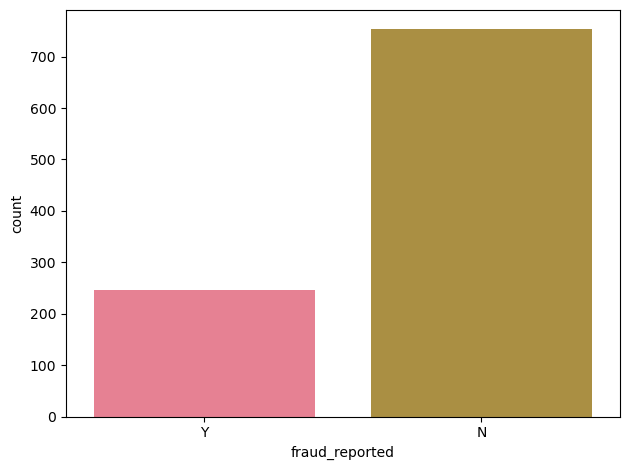

In [127]:
sns.countplot(x='fraud_reported',data =df)

- 'fraud_reported' is our target variable to be predicted. From count plot we can say dataset is imbalanced in nature.

### Start Exploring target variable against Independent features to gain more insight.


### Age Vs Fraud

<Axes: xlabel='age', ylabel='count'>

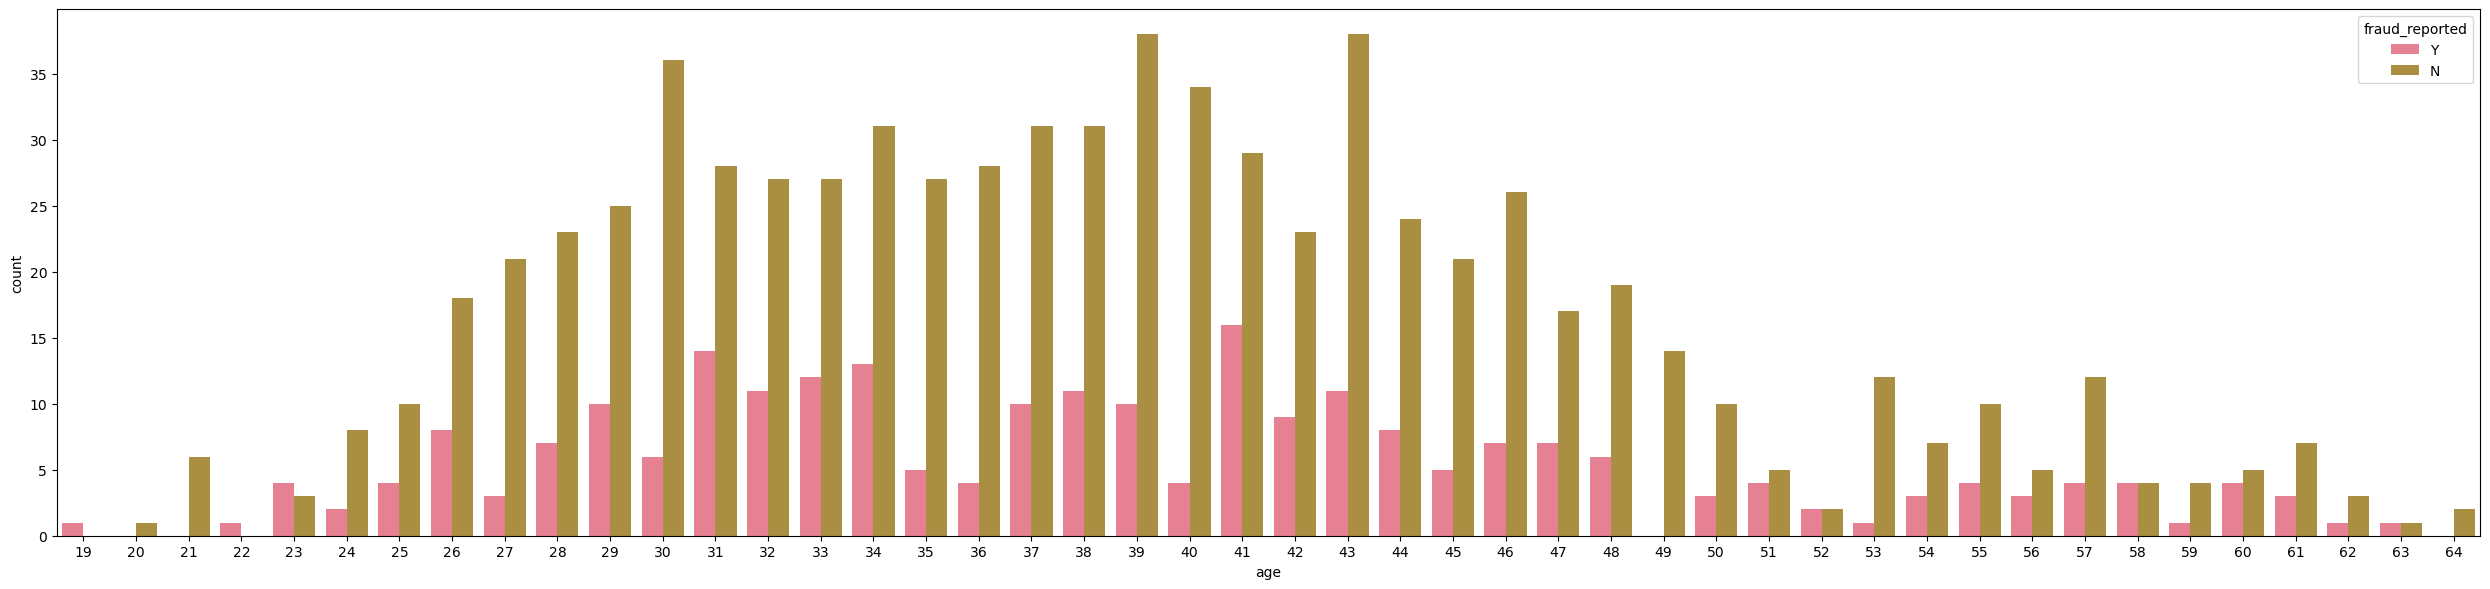

In [128]:
plt.figure(figsize = (25,6))
sns.countplot(x = "age", data =df, hue = "fraud_reported")

<Axes: xlabel='age', ylabel='Count'>

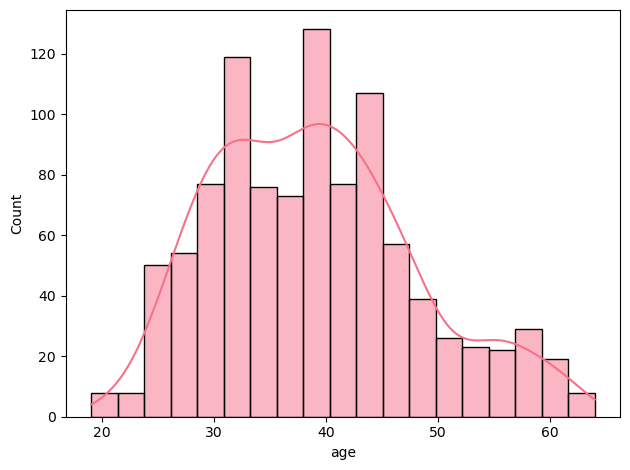

In [129]:
sns.histplot(df['age'], kde = True)

#### Observation:

- Maximum Fraud Cases Comes From People With Age Of 31-50 Year.
- Very Few Cases In 60+ Year Old Peoples.

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_zip                  1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

### Policy_State Vs Fraud_Reported

<Axes: xlabel='policy_state', ylabel='count'>

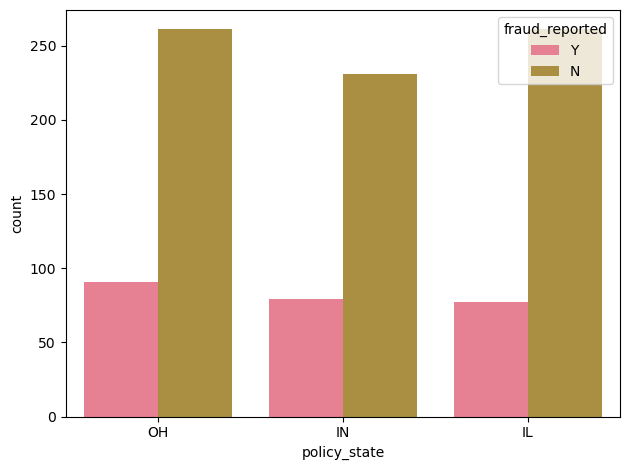

In [131]:
sns.countplot(x="policy_state",data =df, hue ='fraud_reported' )

<Axes: ylabel='count'>

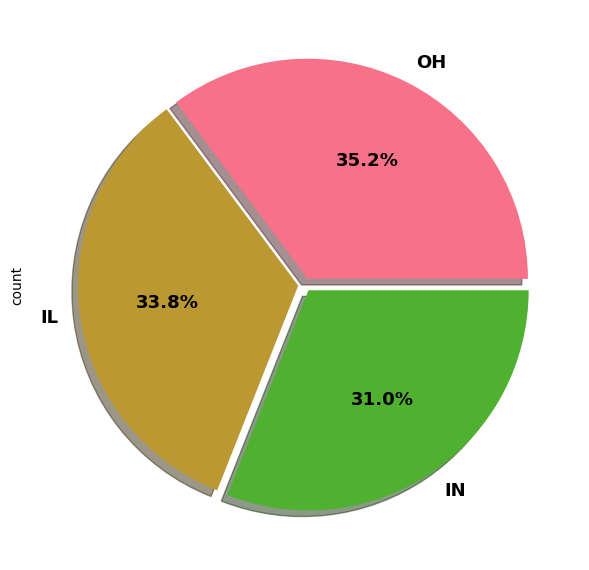

In [132]:
plt.figure(figsize=(6,6))
df['policy_state'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, shadow=True)


#### Observation:
- Almost Same Amount Of Cases Are Come From Each State.
- Maximum Fraud Cases Are Come From State Ff OH.

### Insured_Sex Vs Fraud_Reported

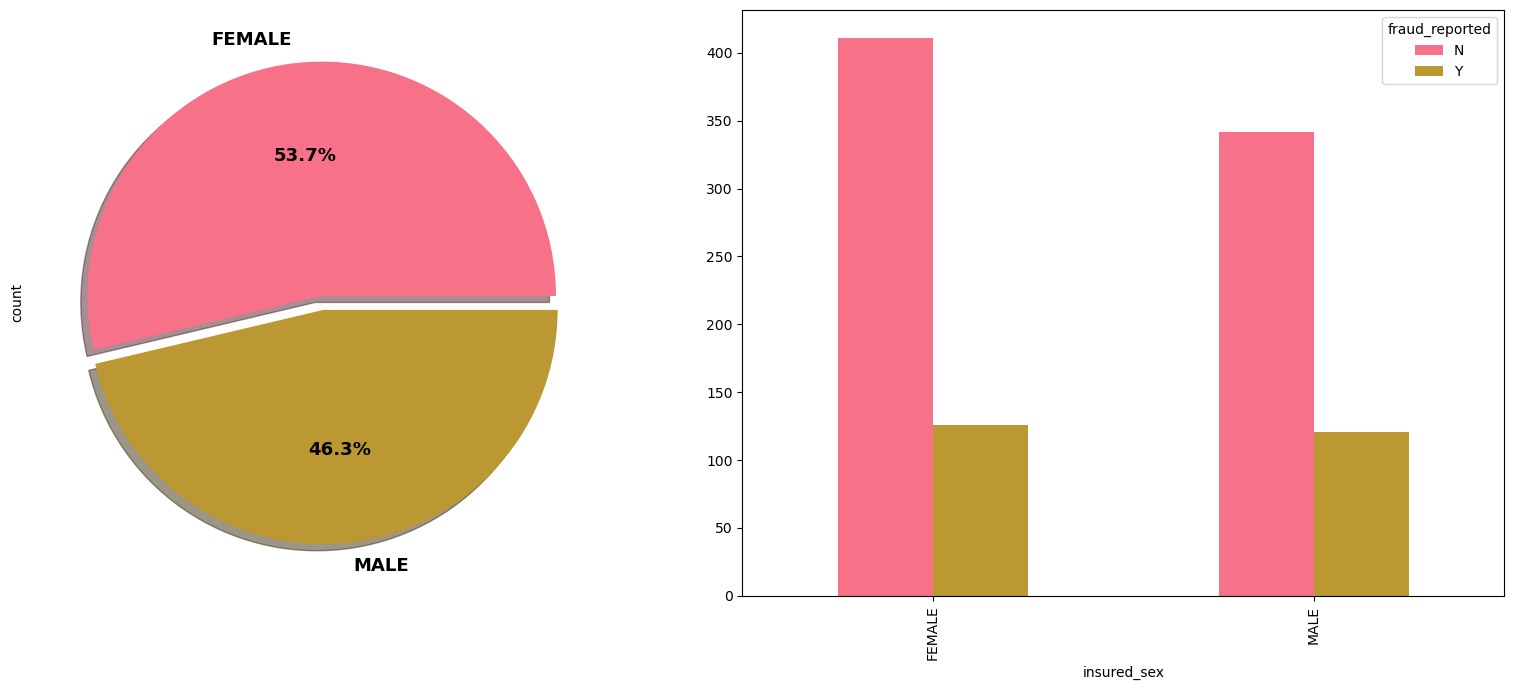

In [133]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_sex'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
table = pd.crosstab(df['insured_sex'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
plt.tight_layout()
plt.show()

#### Comment :
- Number Of Claims Come From Female Is Higher Than Which Reported By Male Insured.
- Almost Same Amount Of Fraud Cases Comes From Same Gender.

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_zip                  1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

### Insured_Education_Level Vs Fraud_Reported

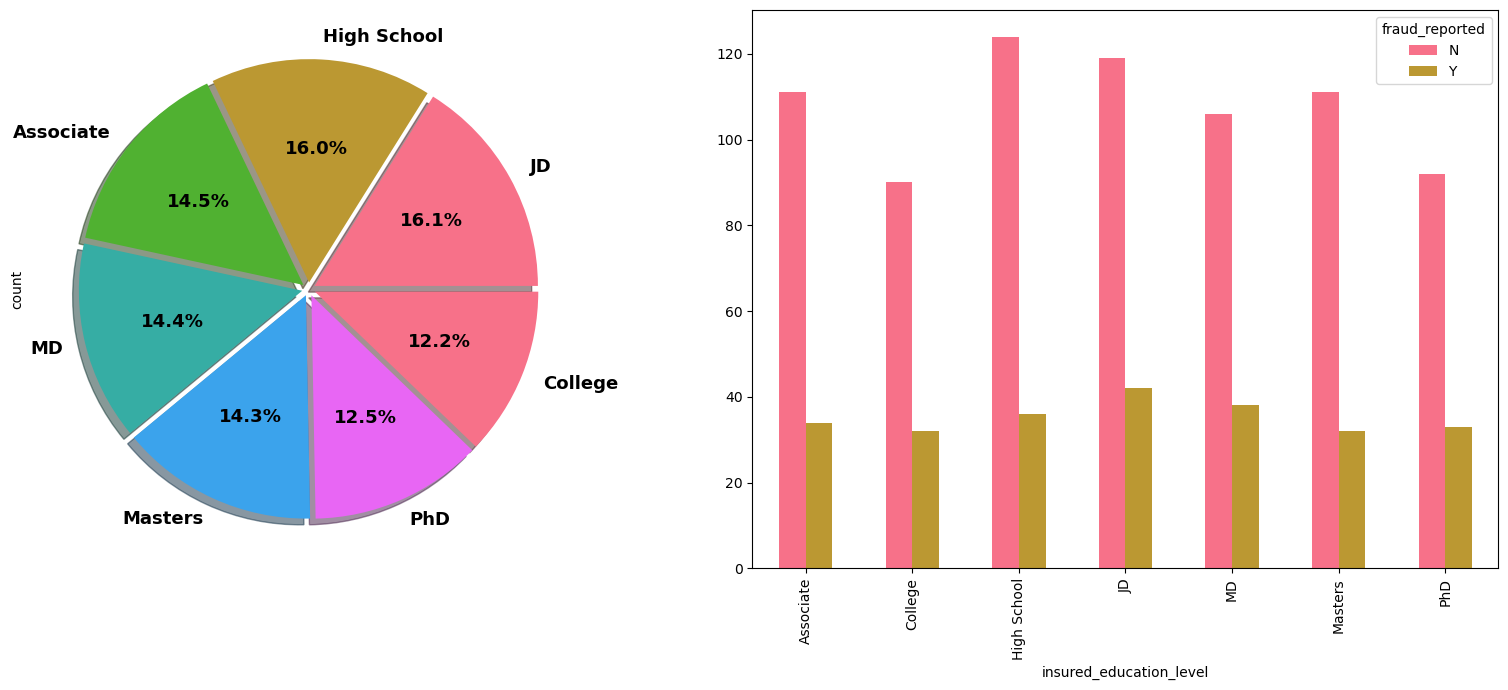

In [135]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_education_level'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
table = pd.crosstab(df['insured_education_level'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
plt.tight_layout()
plt.show()

#### Comment :
<b> We can see tendency to make fraud claims has across every education backgroud, even in Masters,PhD. 
Education Level is not much important variable for us !!! </b>

### Insured_Occupation Vs  Fraud_Reported

<Axes: xlabel='insured_occupation', ylabel='count'>

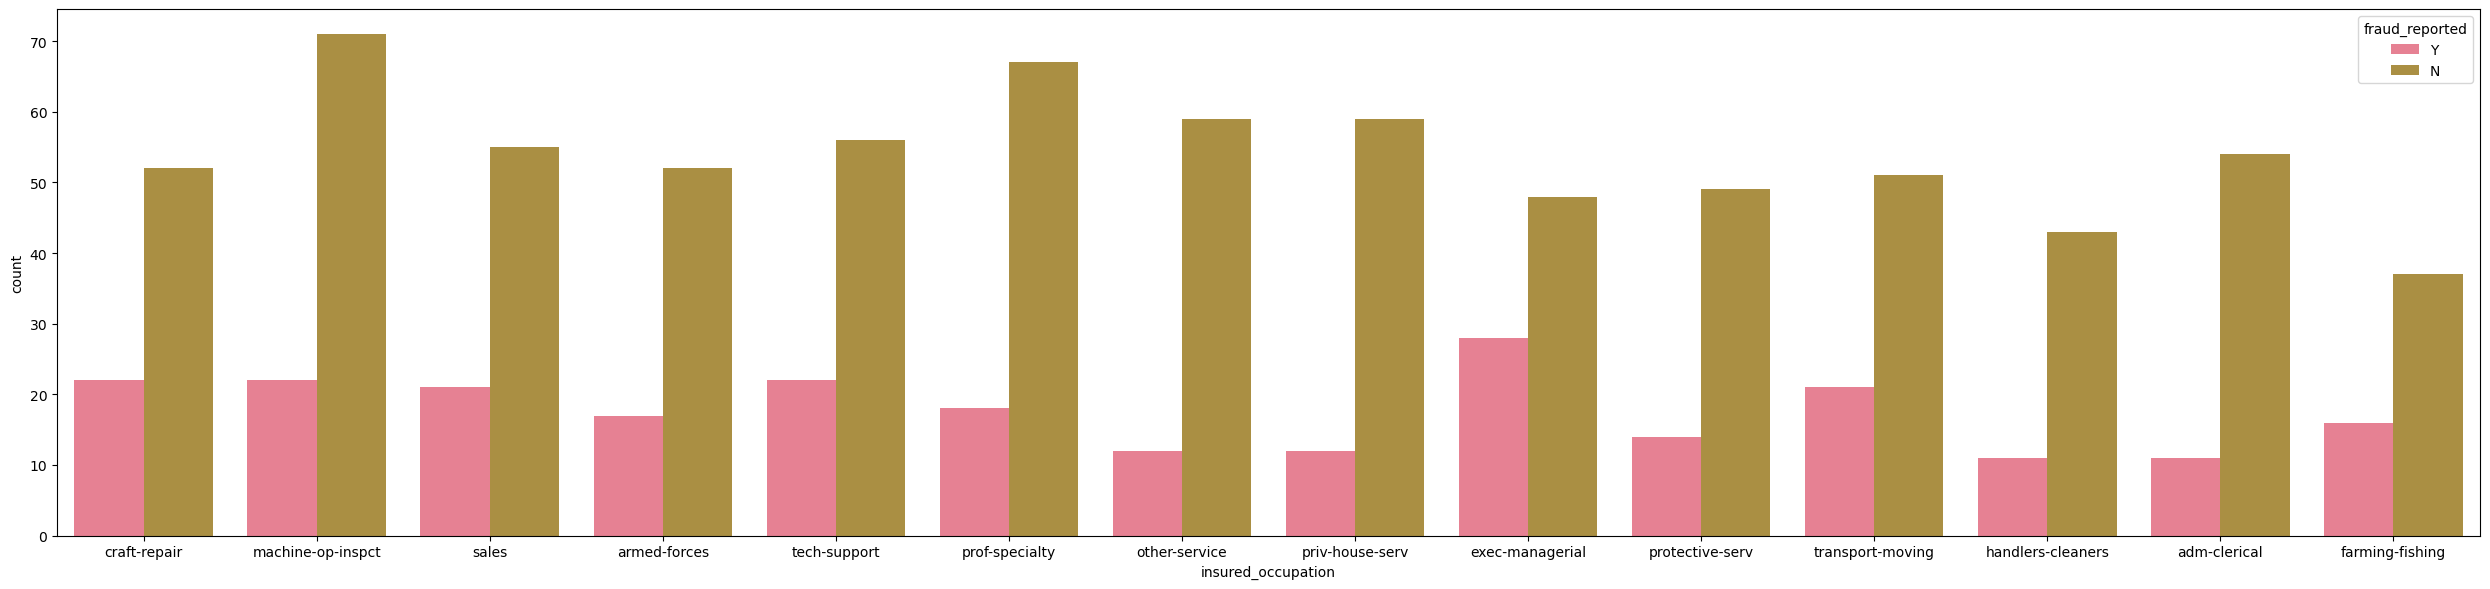

In [136]:
plt.figure(figsize = (25,6))
sns.countplot(x ='insured_occupation',data =df , hue ="fraud_reported")

### Insured_Hobbies Vs  Fraud_Reported

<Axes: xlabel='insured_hobbies', ylabel='count'>

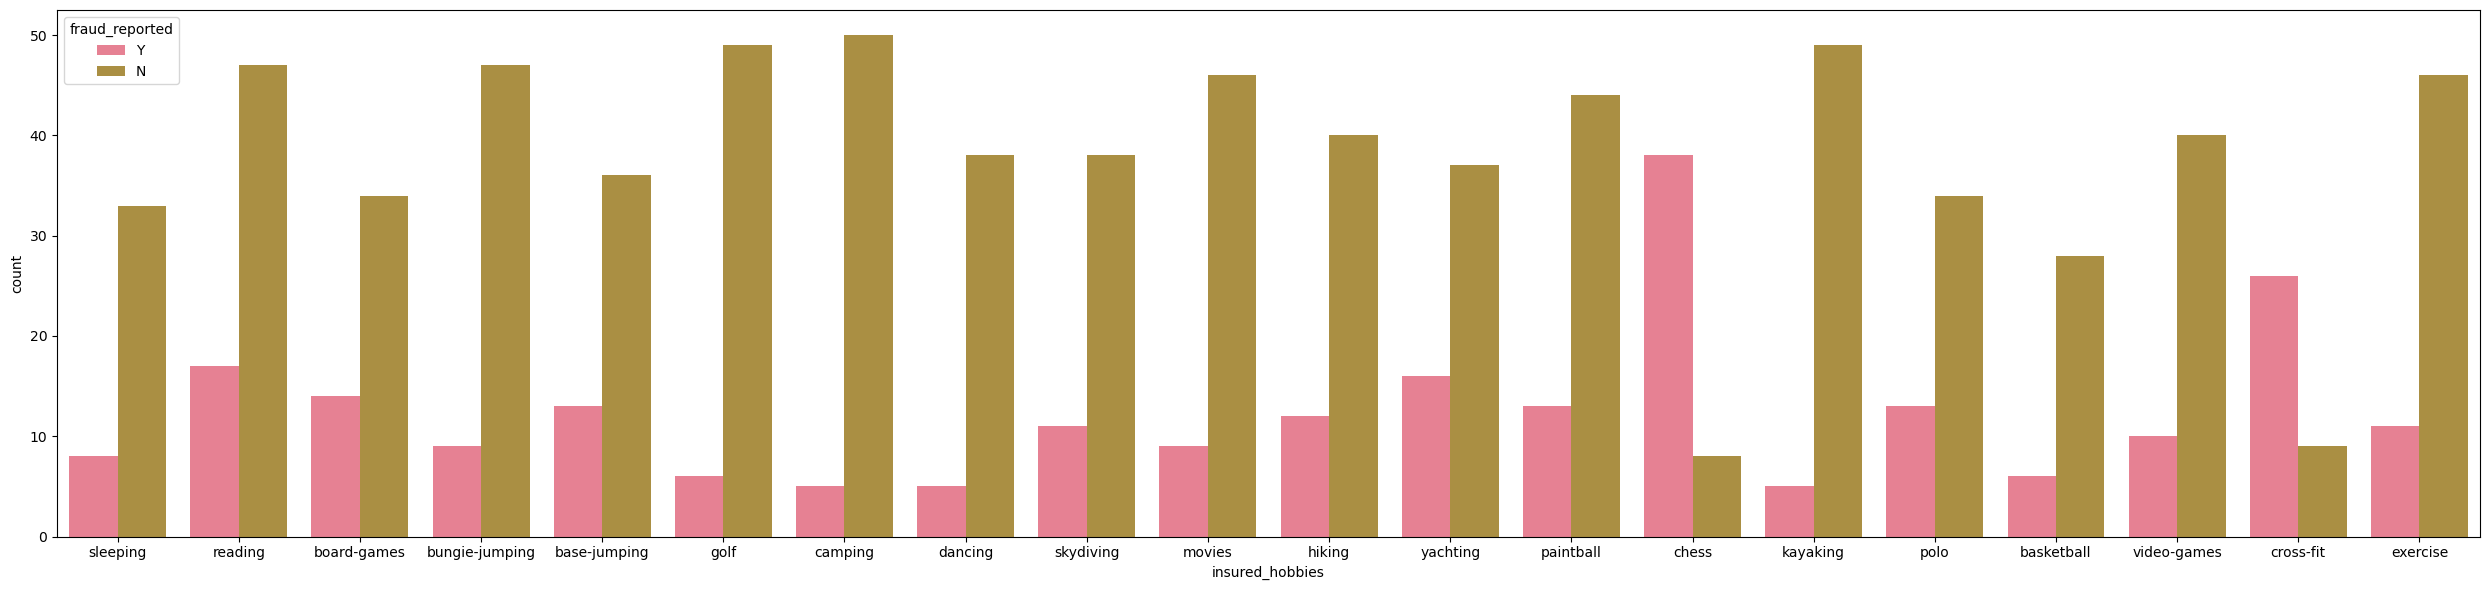

In [137]:
plt.figure(figsize = (25,6))
sns.countplot(x ='insured_hobbies',data =df , hue ="fraud_reported")

### Insured_Relationship Vs  Fraud_Reported

<Axes: xlabel='insured_relationship', ylabel='count'>

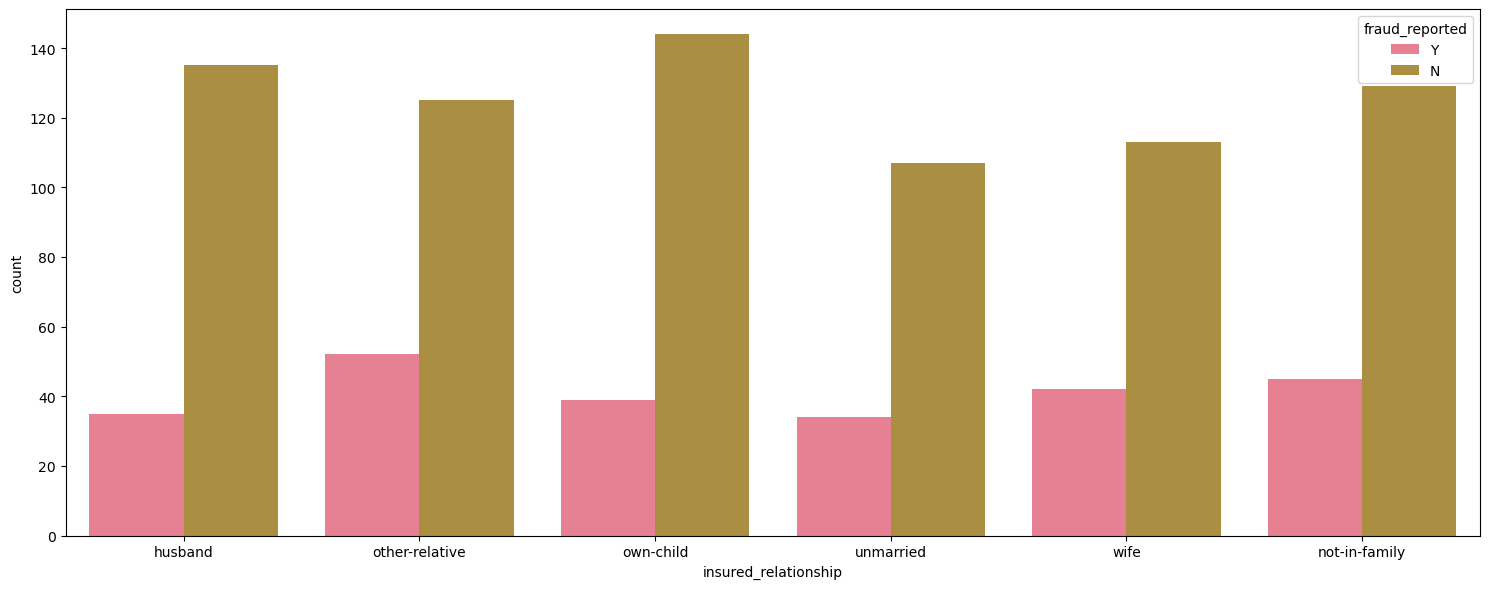

In [138]:
plt.figure(figsize = (15,6))
sns.countplot(x ='insured_relationship',data =df , hue ="fraud_reported")

### Incident_Type Vs  Fraud_Reported

<Axes: xlabel='incident_type', ylabel='count'>

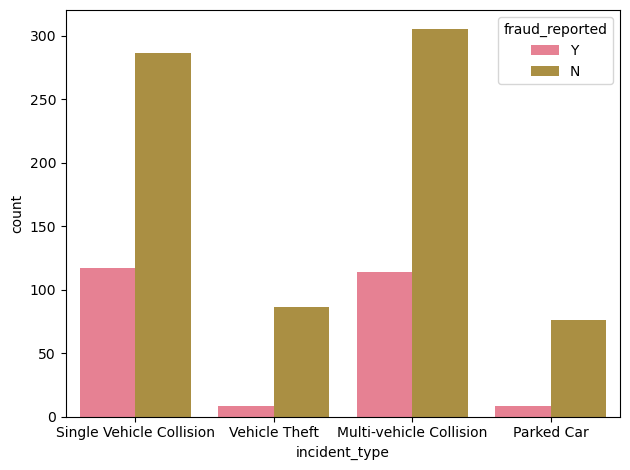

In [139]:
sns.countplot(x ='incident_type',data =df , hue ="fraud_reported")

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_zip                  1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

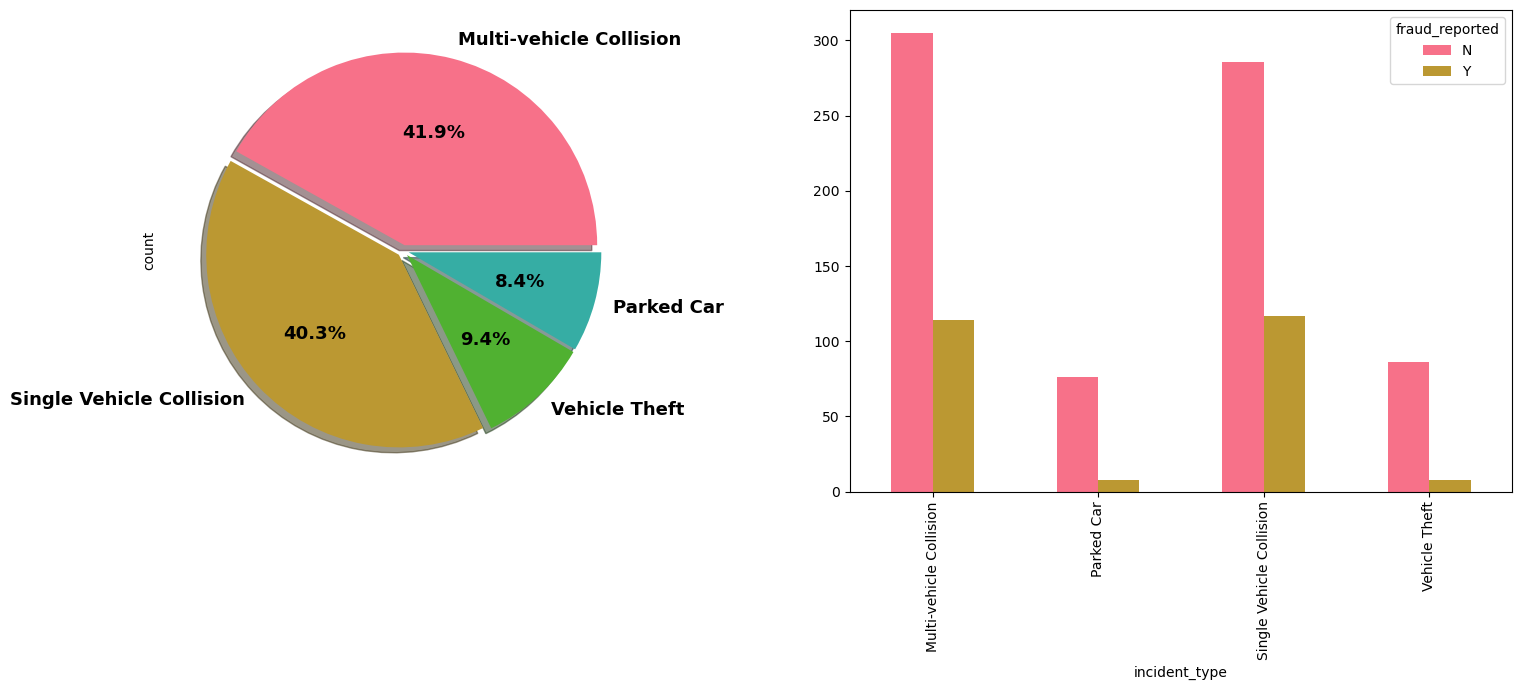

In [141]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['incident_type'].value_counts().plot.pie(explode=[0.03,.03,.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
table = pd.crosstab(df['incident_type'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
plt.tight_layout()
plt.show()

#### Observation :
- Most of case comes from Multi-vehicle and single vehicle collision.
- Some claims are due to automobile robbery.
- <b> <u> One claim out of three claim is fraud </u> in multi or single vehicle collision incident.</b>

<b><em> It will be interesting to figure out collision type and severity for different incident and corresponding fraud claim. </em></b>

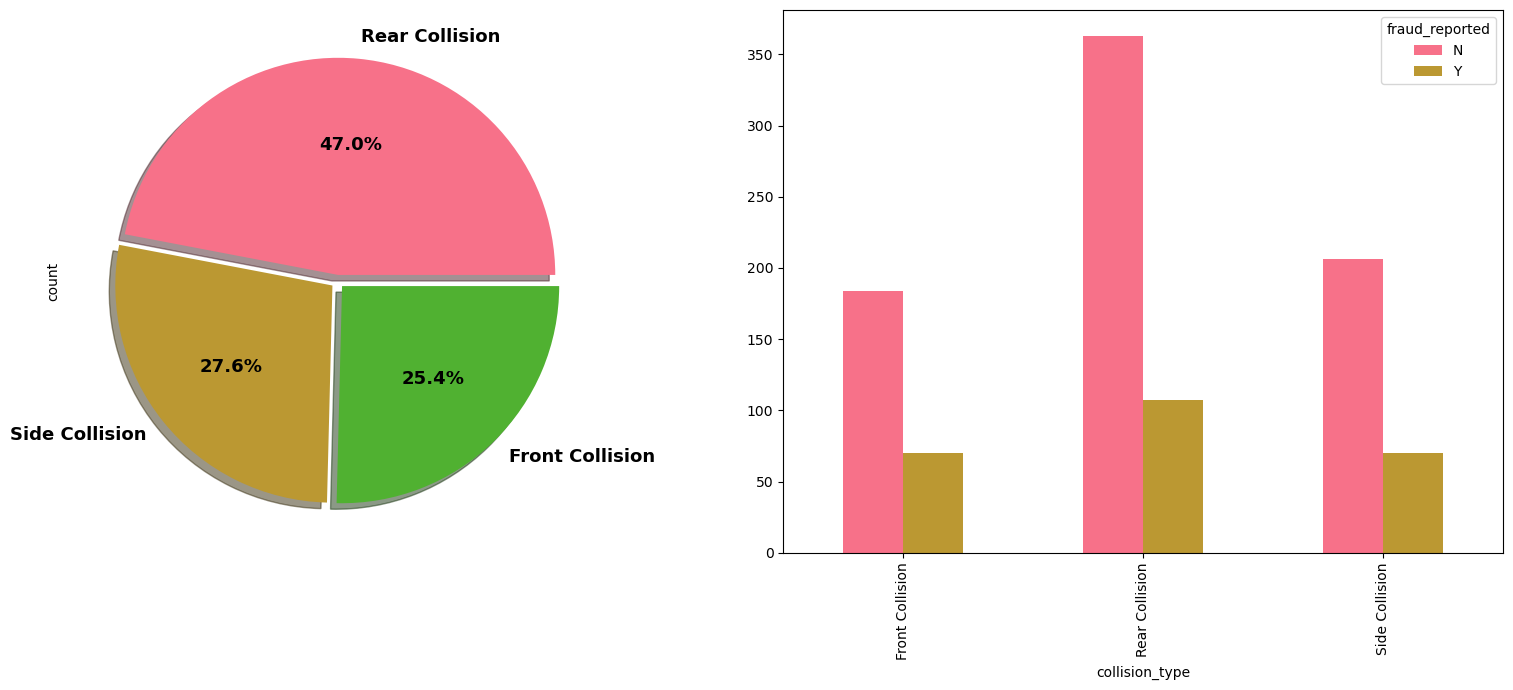

In [142]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['collision_type'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
table = pd.crosstab(df['collision_type'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
plt.tight_layout()
plt.show()

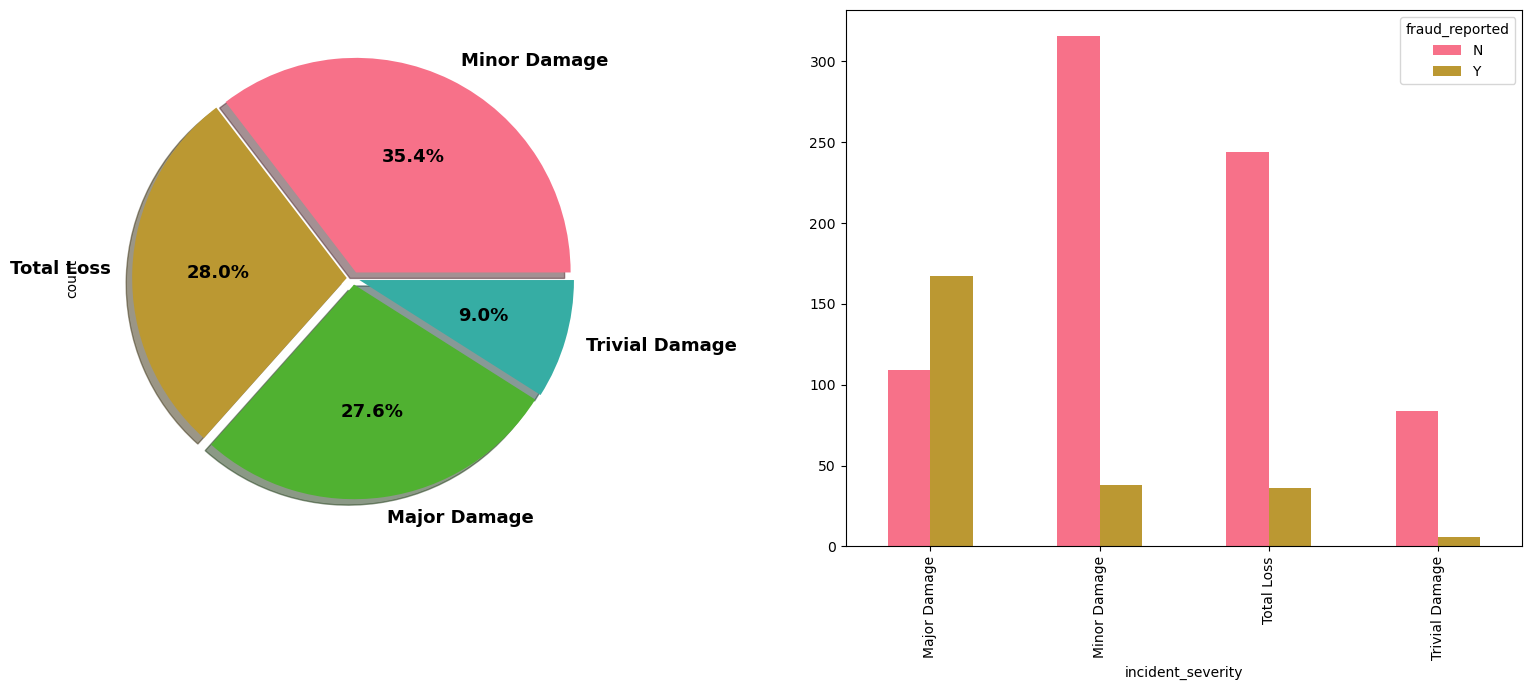

In [143]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['incident_severity'].value_counts().plot.pie(explode=[0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
table = pd.crosstab(df['incident_severity'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
plt.tight_layout()
plt.show()

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_zip                  1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

### Authorities_Contacted Vs  Fraud_Reported

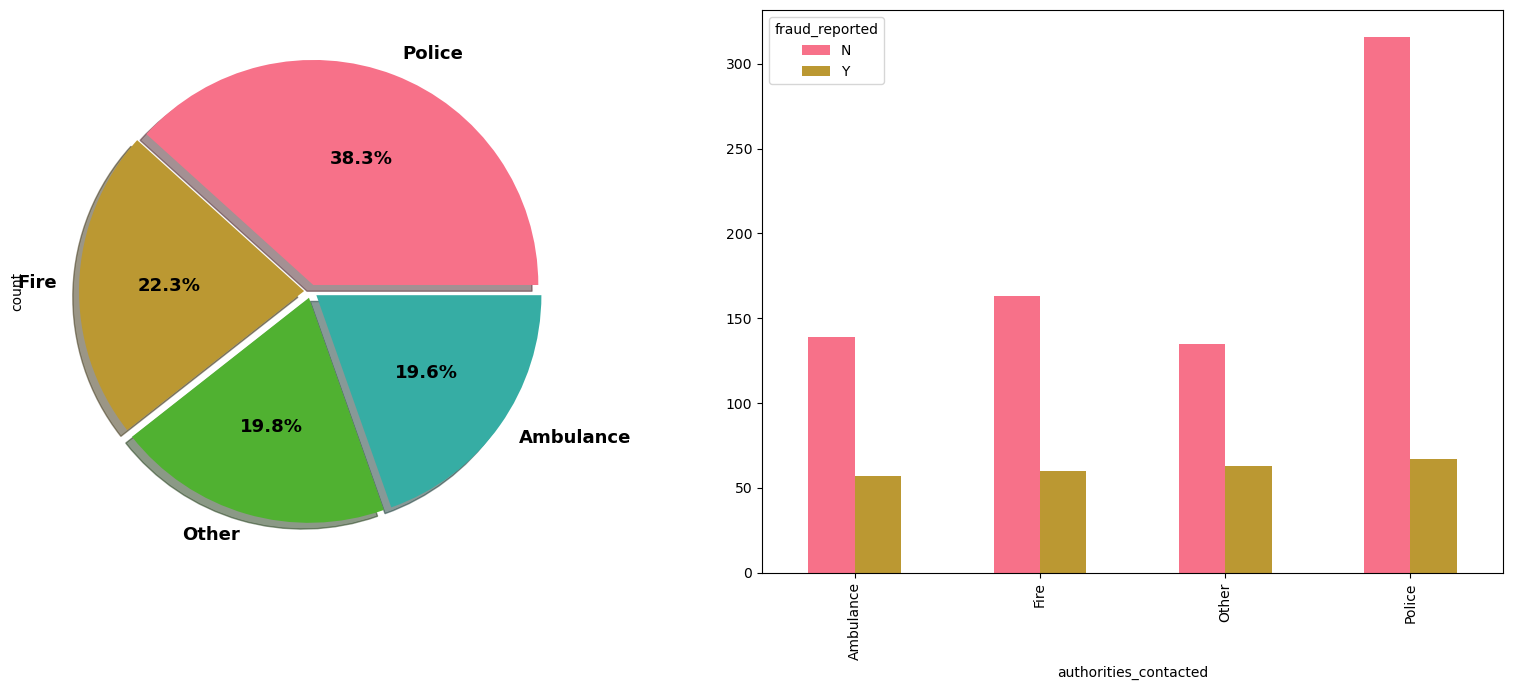

In [145]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['authorities_contacted'].value_counts().plot.pie(explode=[0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
table = pd.crosstab(df['authorities_contacted'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
plt.tight_layout()
plt.show()

### Incident_State Vs  Fraud_Reported

In [146]:
df['incident_state'].value_counts()

incident_state
NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: count, dtype: int64

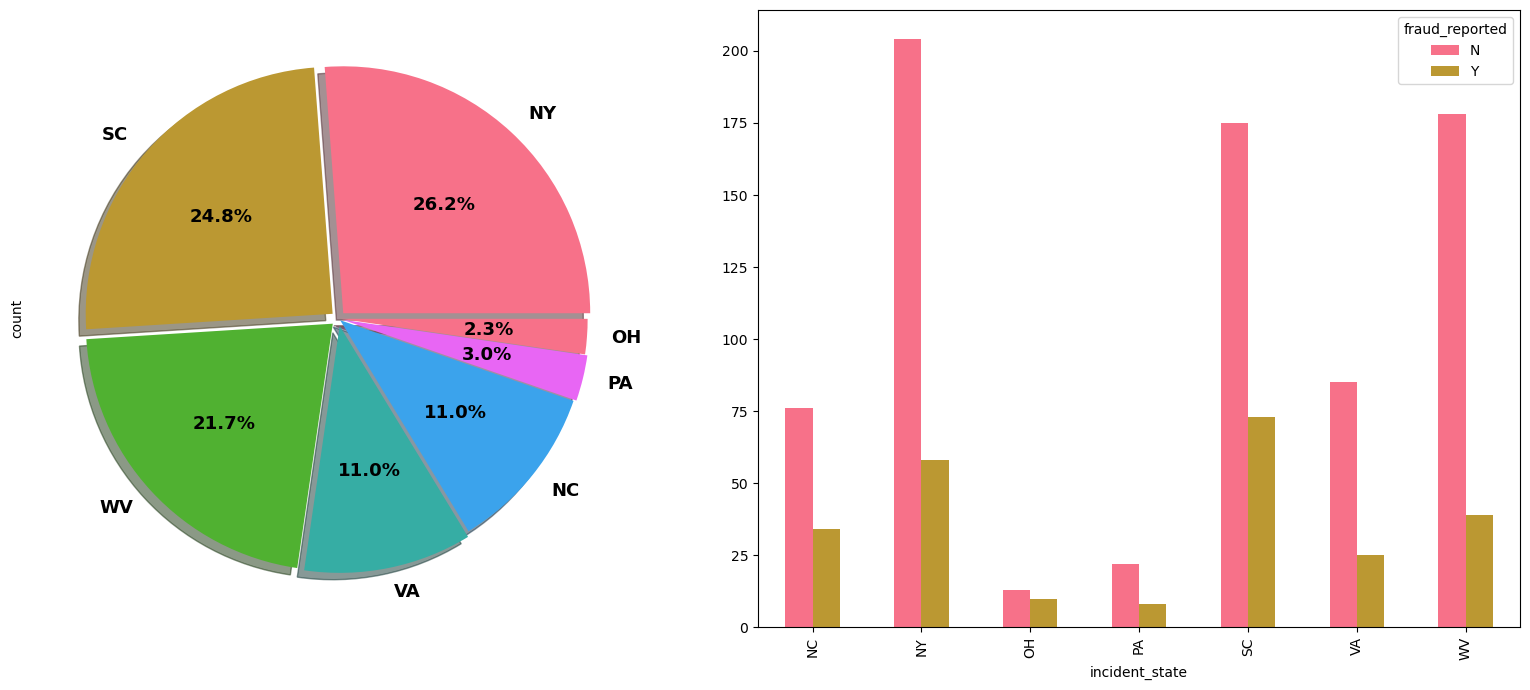

In [147]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['incident_state'].value_counts().plot.pie(explode=[0.03,0.03,0.03,.03,0.01,0.02,0.01],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
table = pd.crosstab(df['incident_state'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
plt.tight_layout()
plt.show()

## Incident_City Vs  Fraud_Reported

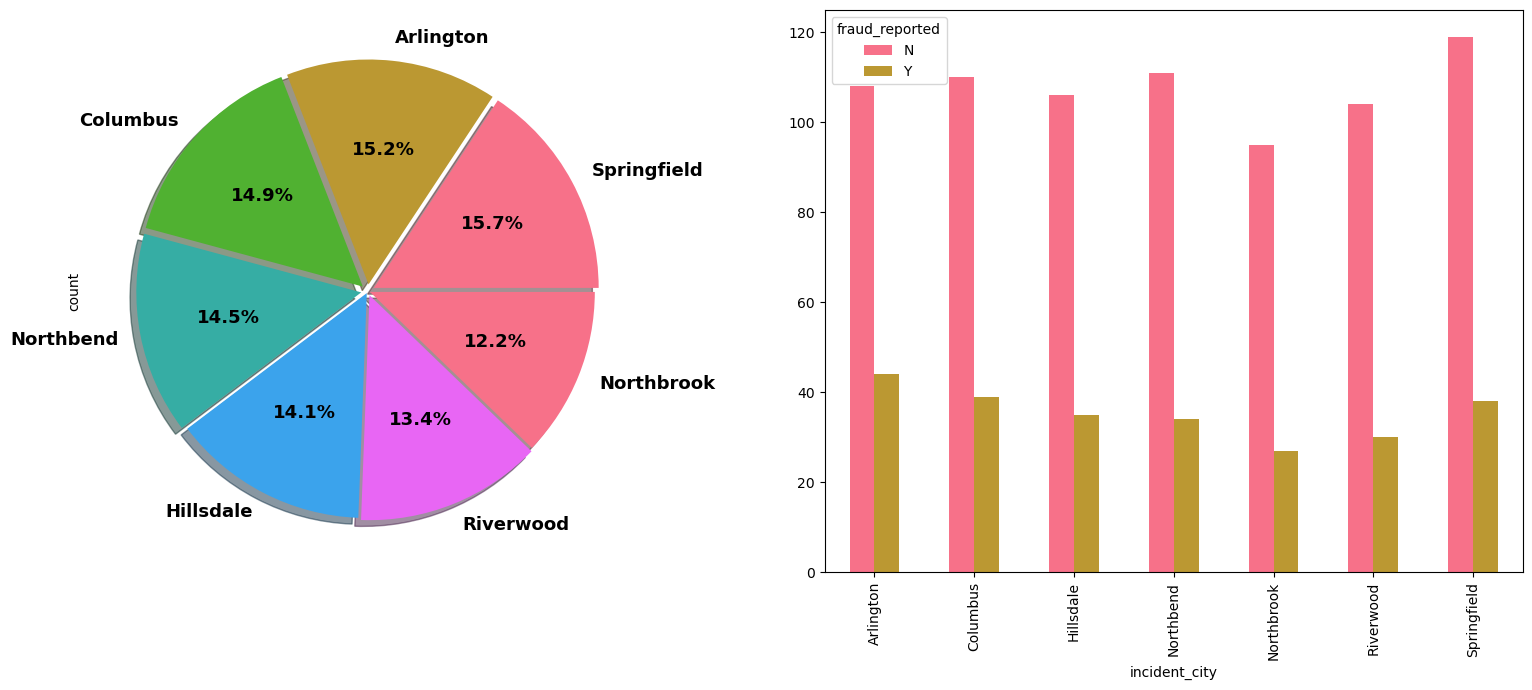

In [148]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['incident_city'].value_counts().plot.pie(explode=[0.03,0.03,0.03,.03,0.01,0.02,0.01],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
table = pd.crosstab(df['incident_city'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
plt.tight_layout()
plt.show()

### Property_Damage Vs  Fraud_Reported

In [149]:
df['property_damage'].value_counts()

property_damage
NO     698
YES    302
Name: count, dtype: int64

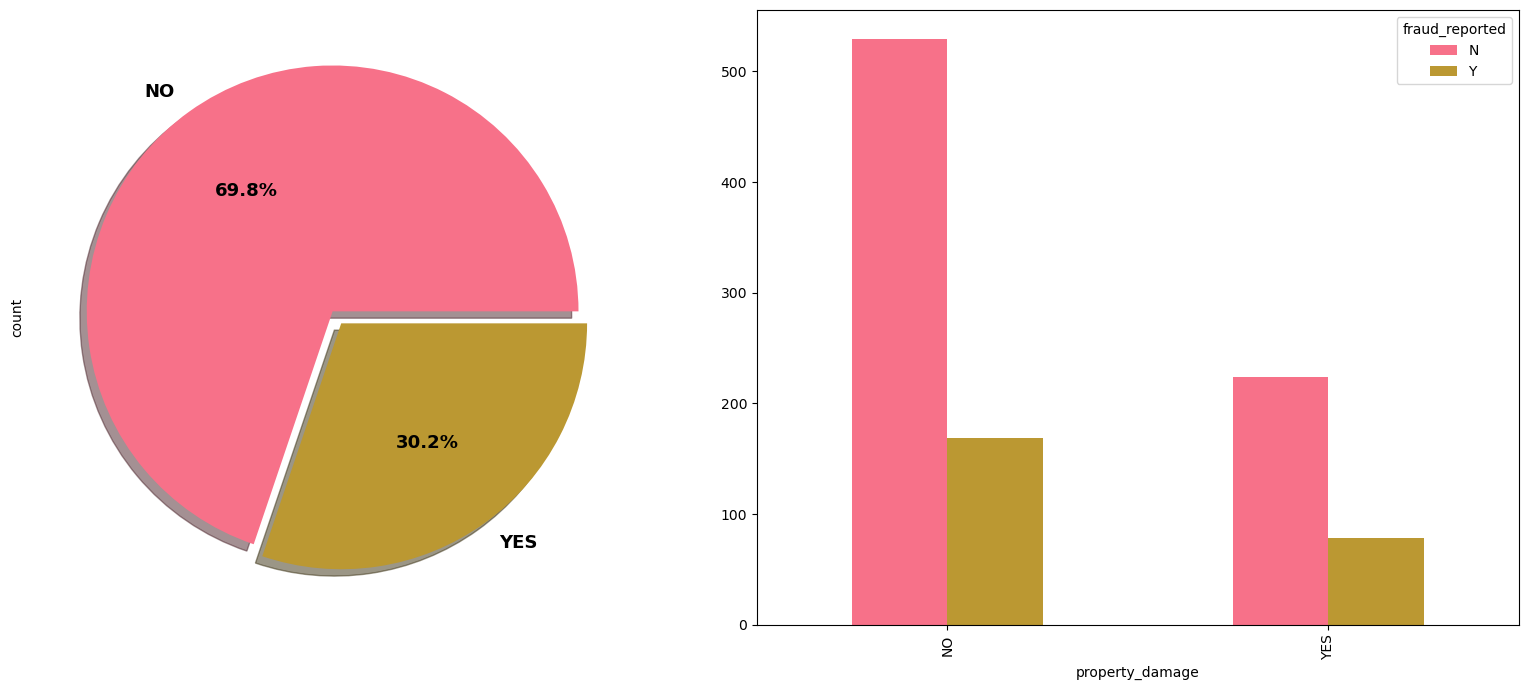

In [150]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['property_damage'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
table = pd.crosstab(df['property_damage'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
plt.tight_layout()
plt.show()

### Police_Report_Available Vs  Fraud_Reported

In [151]:
df['police_report_available'].value_counts()

police_report_available
NO     686
YES    314
Name: count, dtype: int64

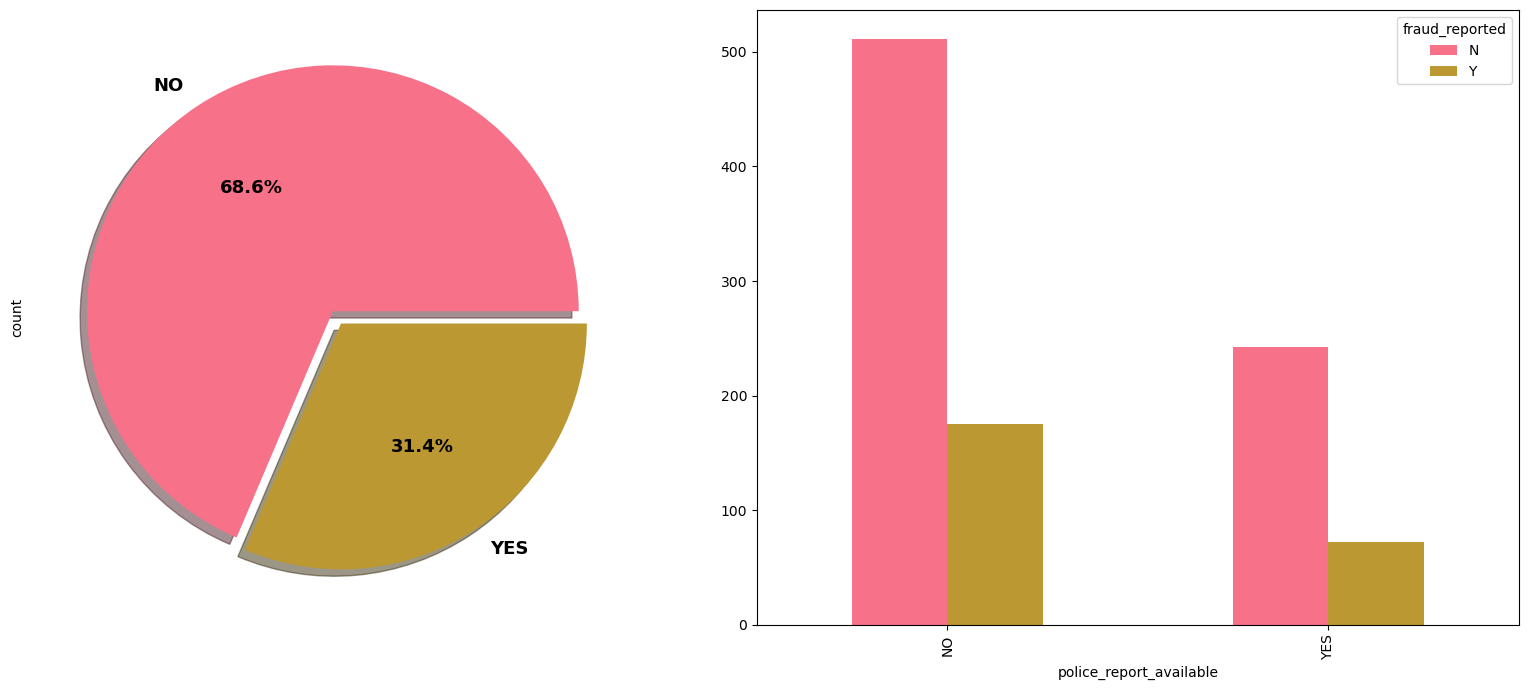

In [152]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['police_report_available'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
table = pd.crosstab(df['police_report_available'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
plt.tight_layout()
plt.show()

### Auto_Make Vs  Fraud_Reported

In [153]:
df['auto_make'].value_counts()

auto_make
Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: count, dtype: int64

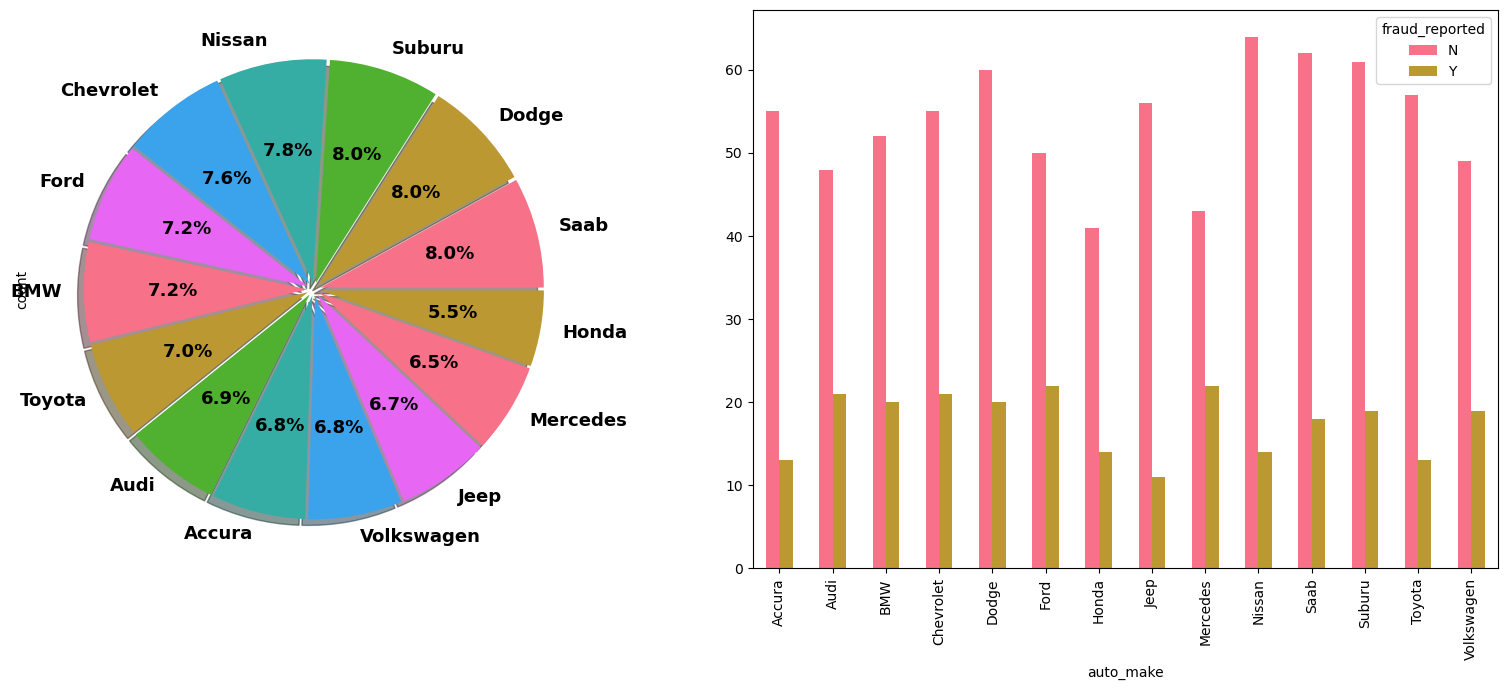

In [154]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['auto_make'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
table = pd.crosstab(df['auto_make'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
plt.tight_layout()
plt.show()

### Auto_Model Vs  Fraud_Reported

<Axes: xlabel='auto_model', ylabel='count'>

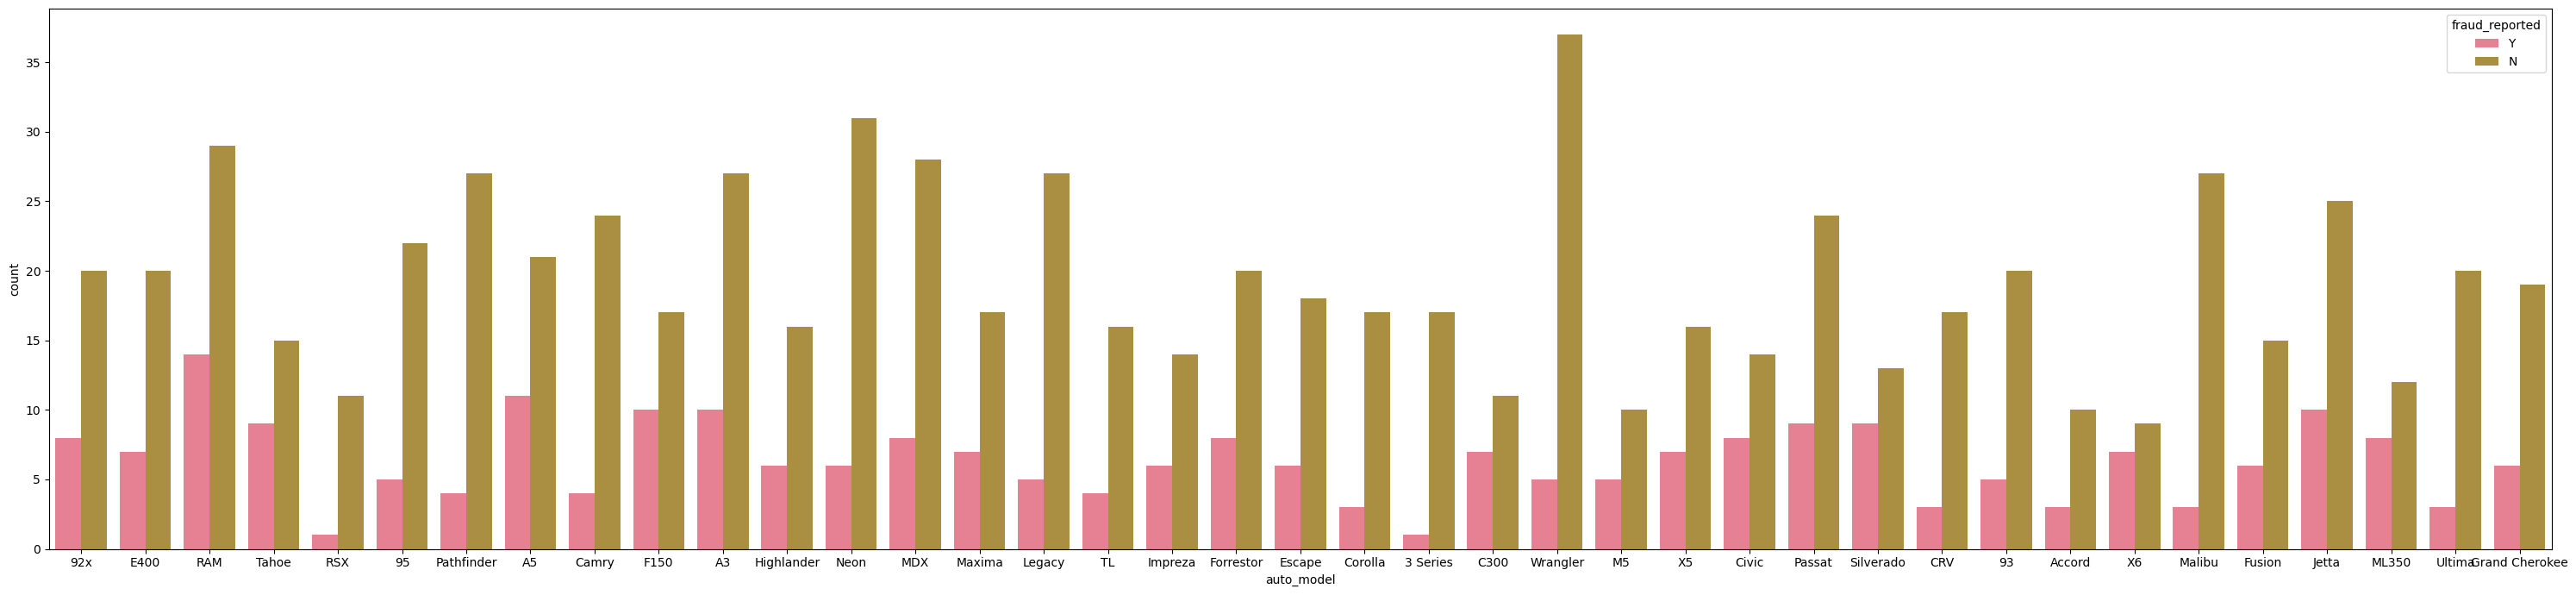

In [155]:
plt.figure(figsize=(30,7))
sns.countplot(x='auto_model',data =df , hue ='fraud_reported')

### `Csl_Personal Vs  Fraud_Reported

In [156]:
df['Csl_Personal'].value_counts()

Csl_Personal
250    351
100    349
500    300
Name: count, dtype: int64

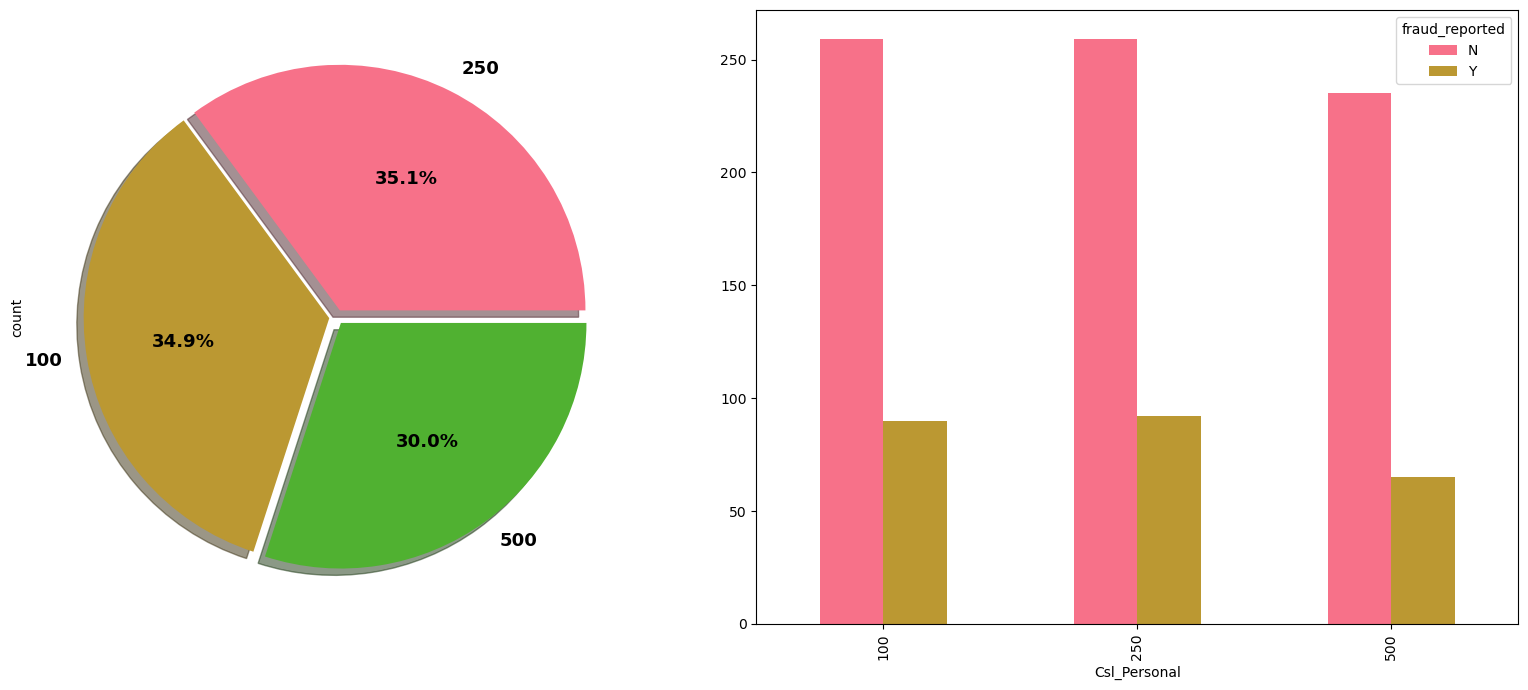

In [157]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['Csl_Personal'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
table = pd.crosstab(df['Csl_Personal'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
plt.tight_layout()
plt.show()

### Csl_Accidental Vs  Fraud_Reported

In [158]:
df['Csl_Accidental'].value_counts()

Csl_Accidental
500     351
300     349
1000    300
Name: count, dtype: int64

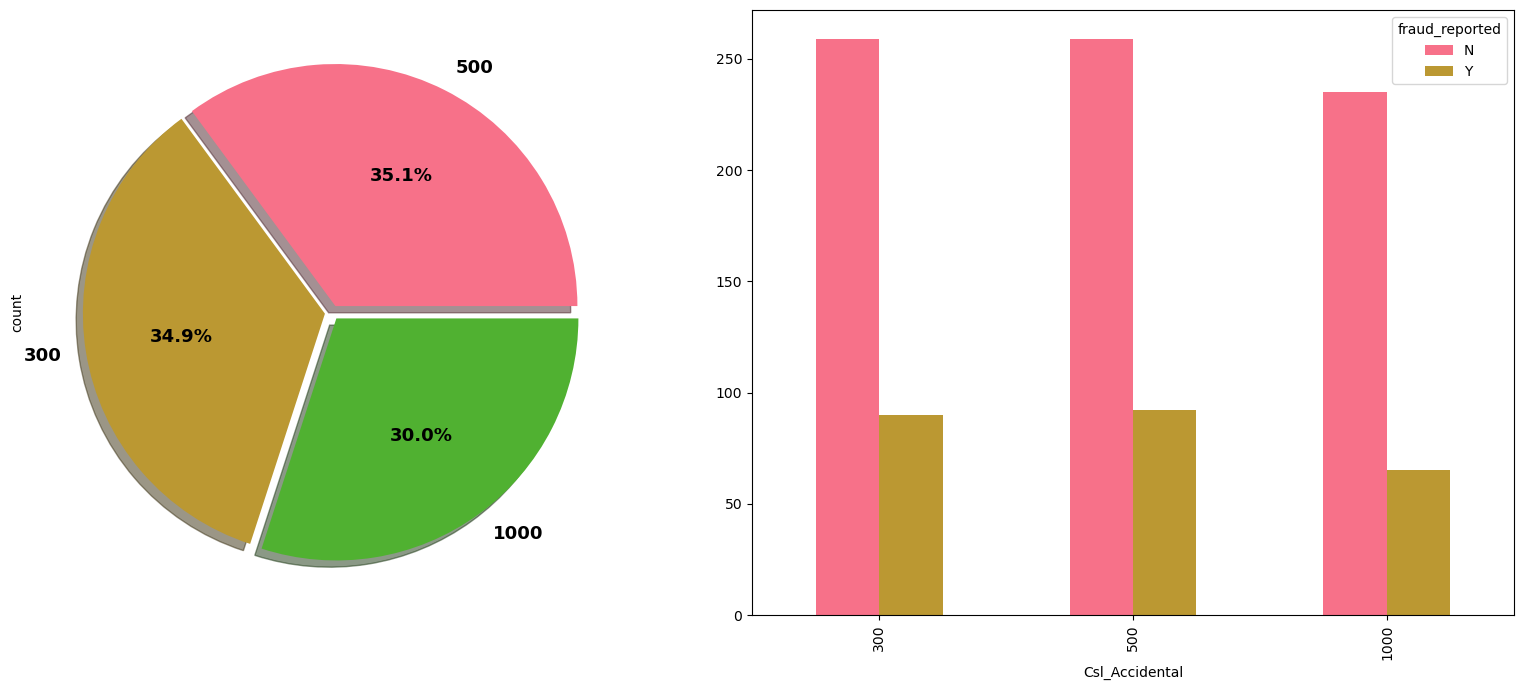

In [159]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['Csl_Accidental'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
table = pd.crosstab(df['Csl_Accidental'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
plt.tight_layout()
plt.show()

### Check Data Distribution And Skewness Of Continuous Data 

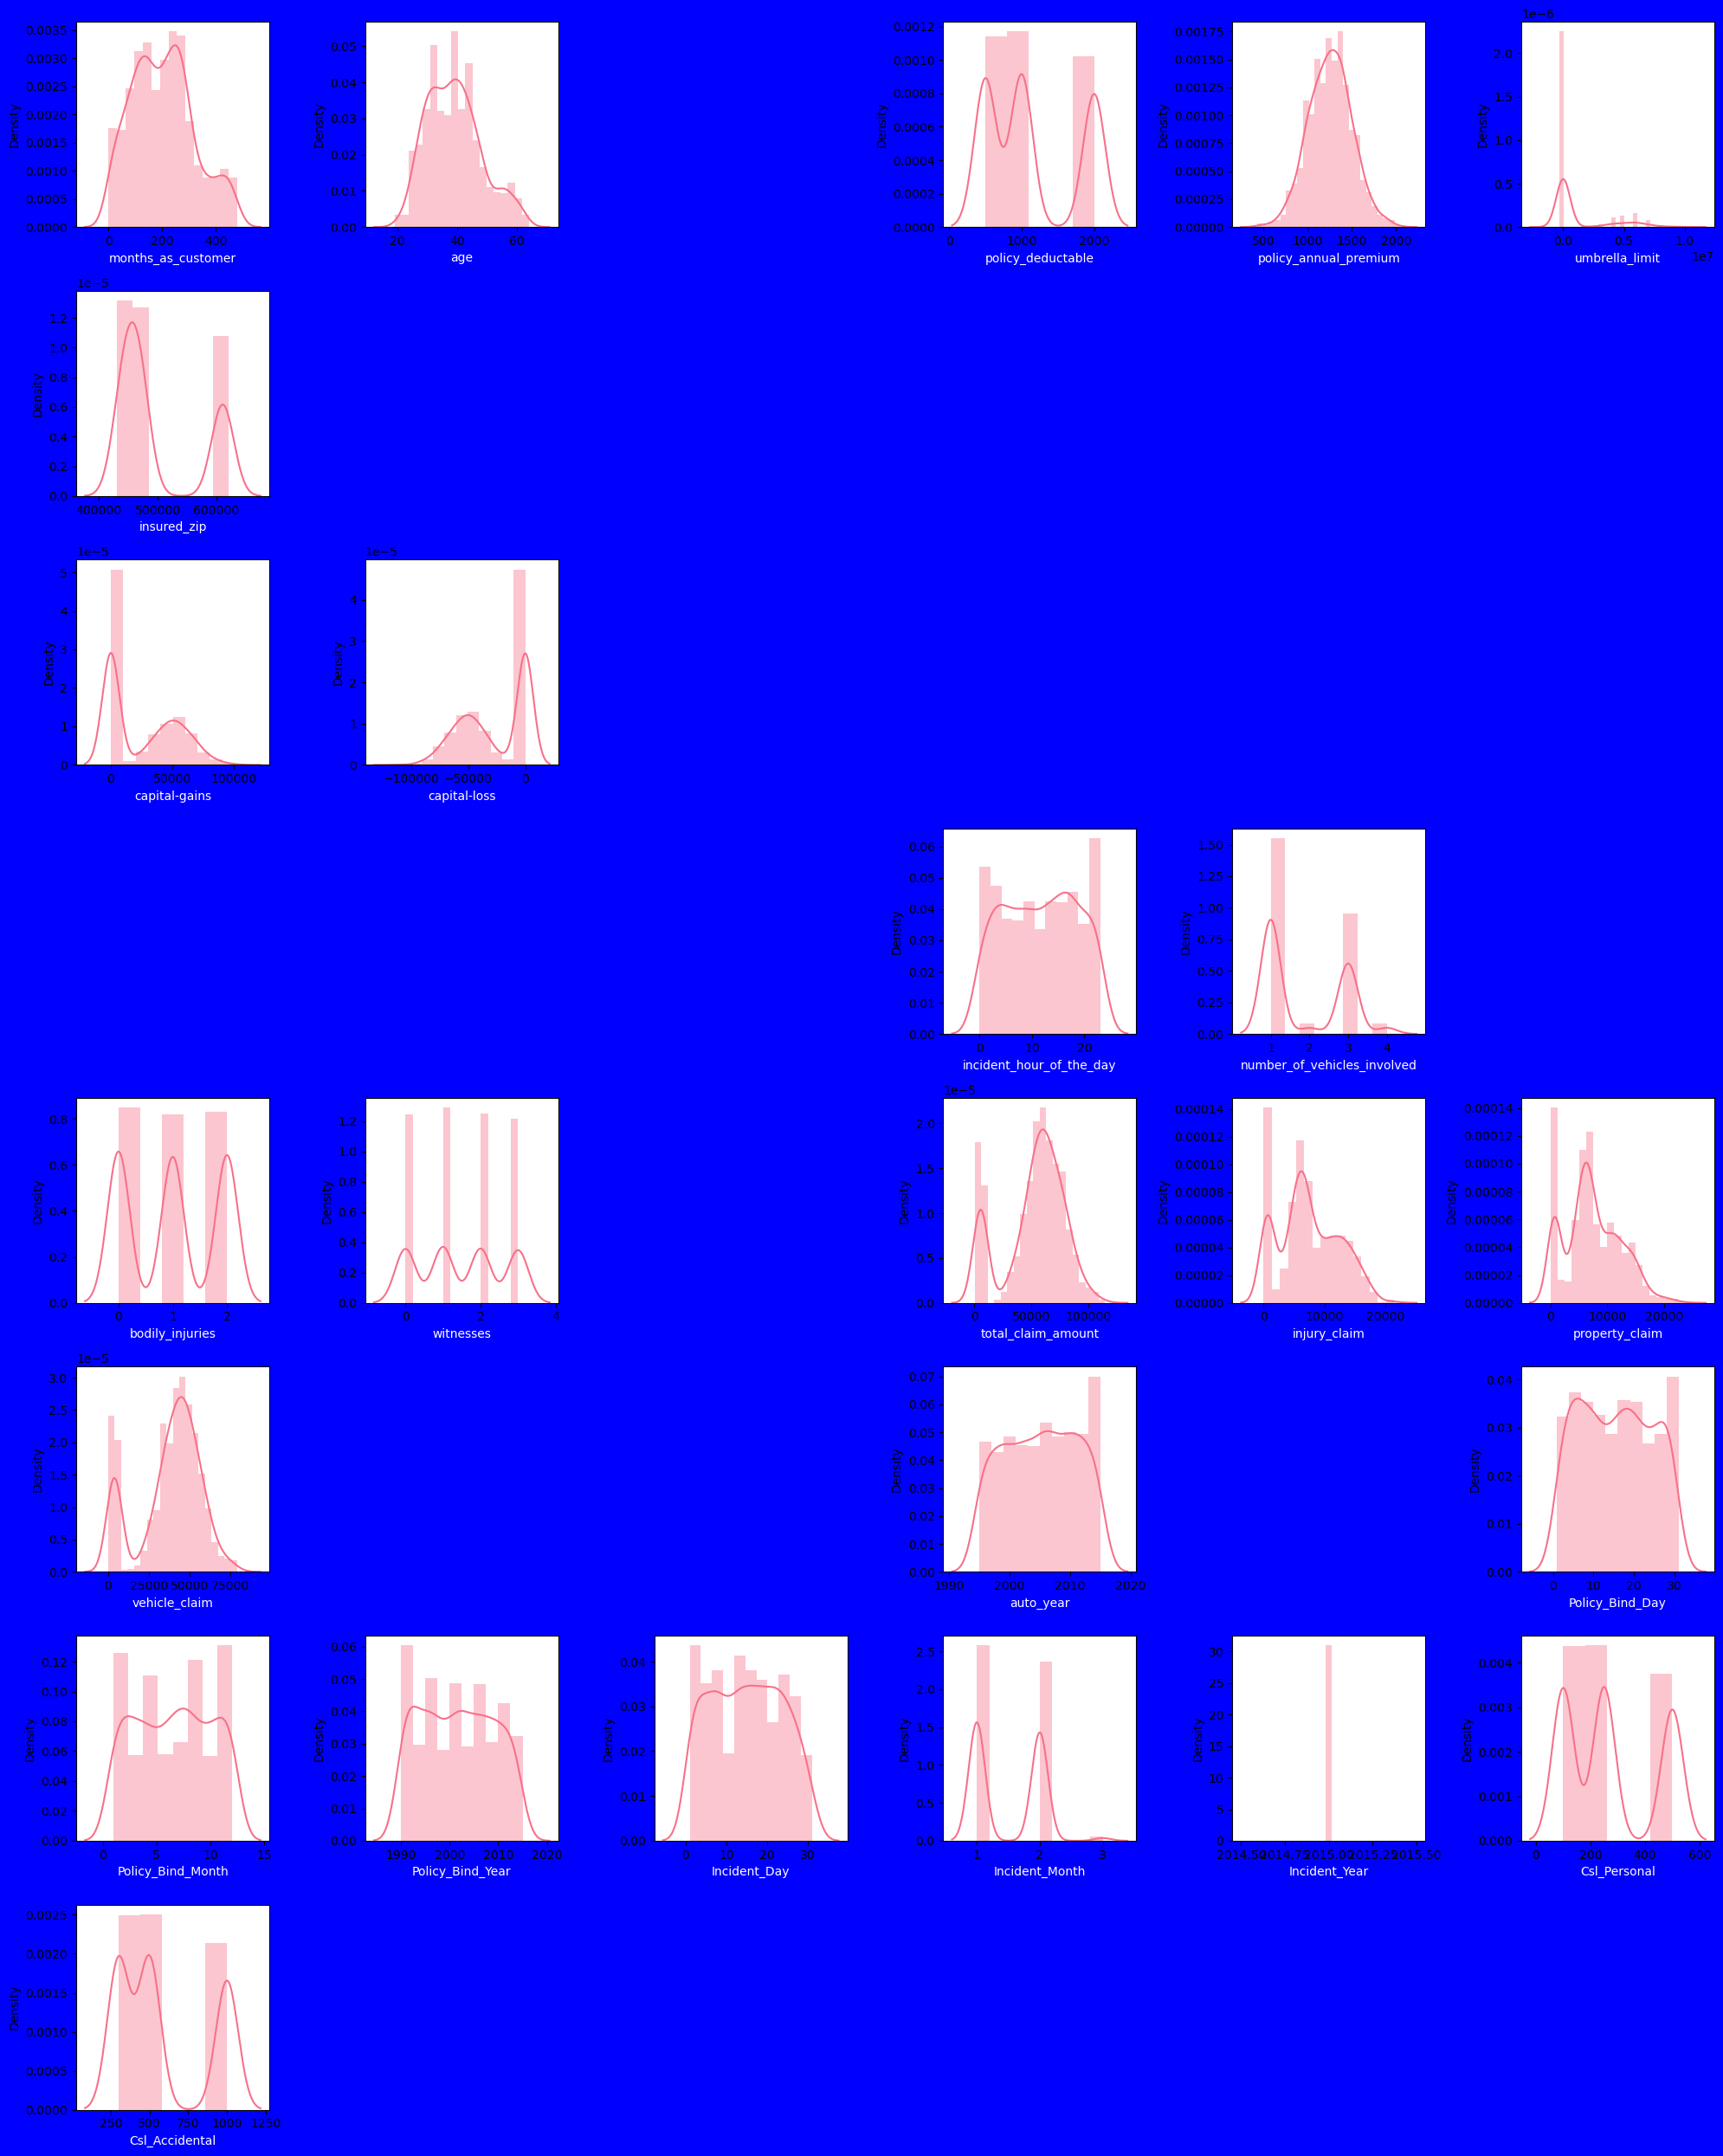

In [160]:
plt.figure(figsize = (20,25), facecolor = "blue")
plotnumber = 1

for column in df:
    if plotnumber<=len(df.columns) and df[column].dtype !="object":
        axs = plt.subplot(8,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 10,color = "white")
    plotnumber +=1
plt.show()

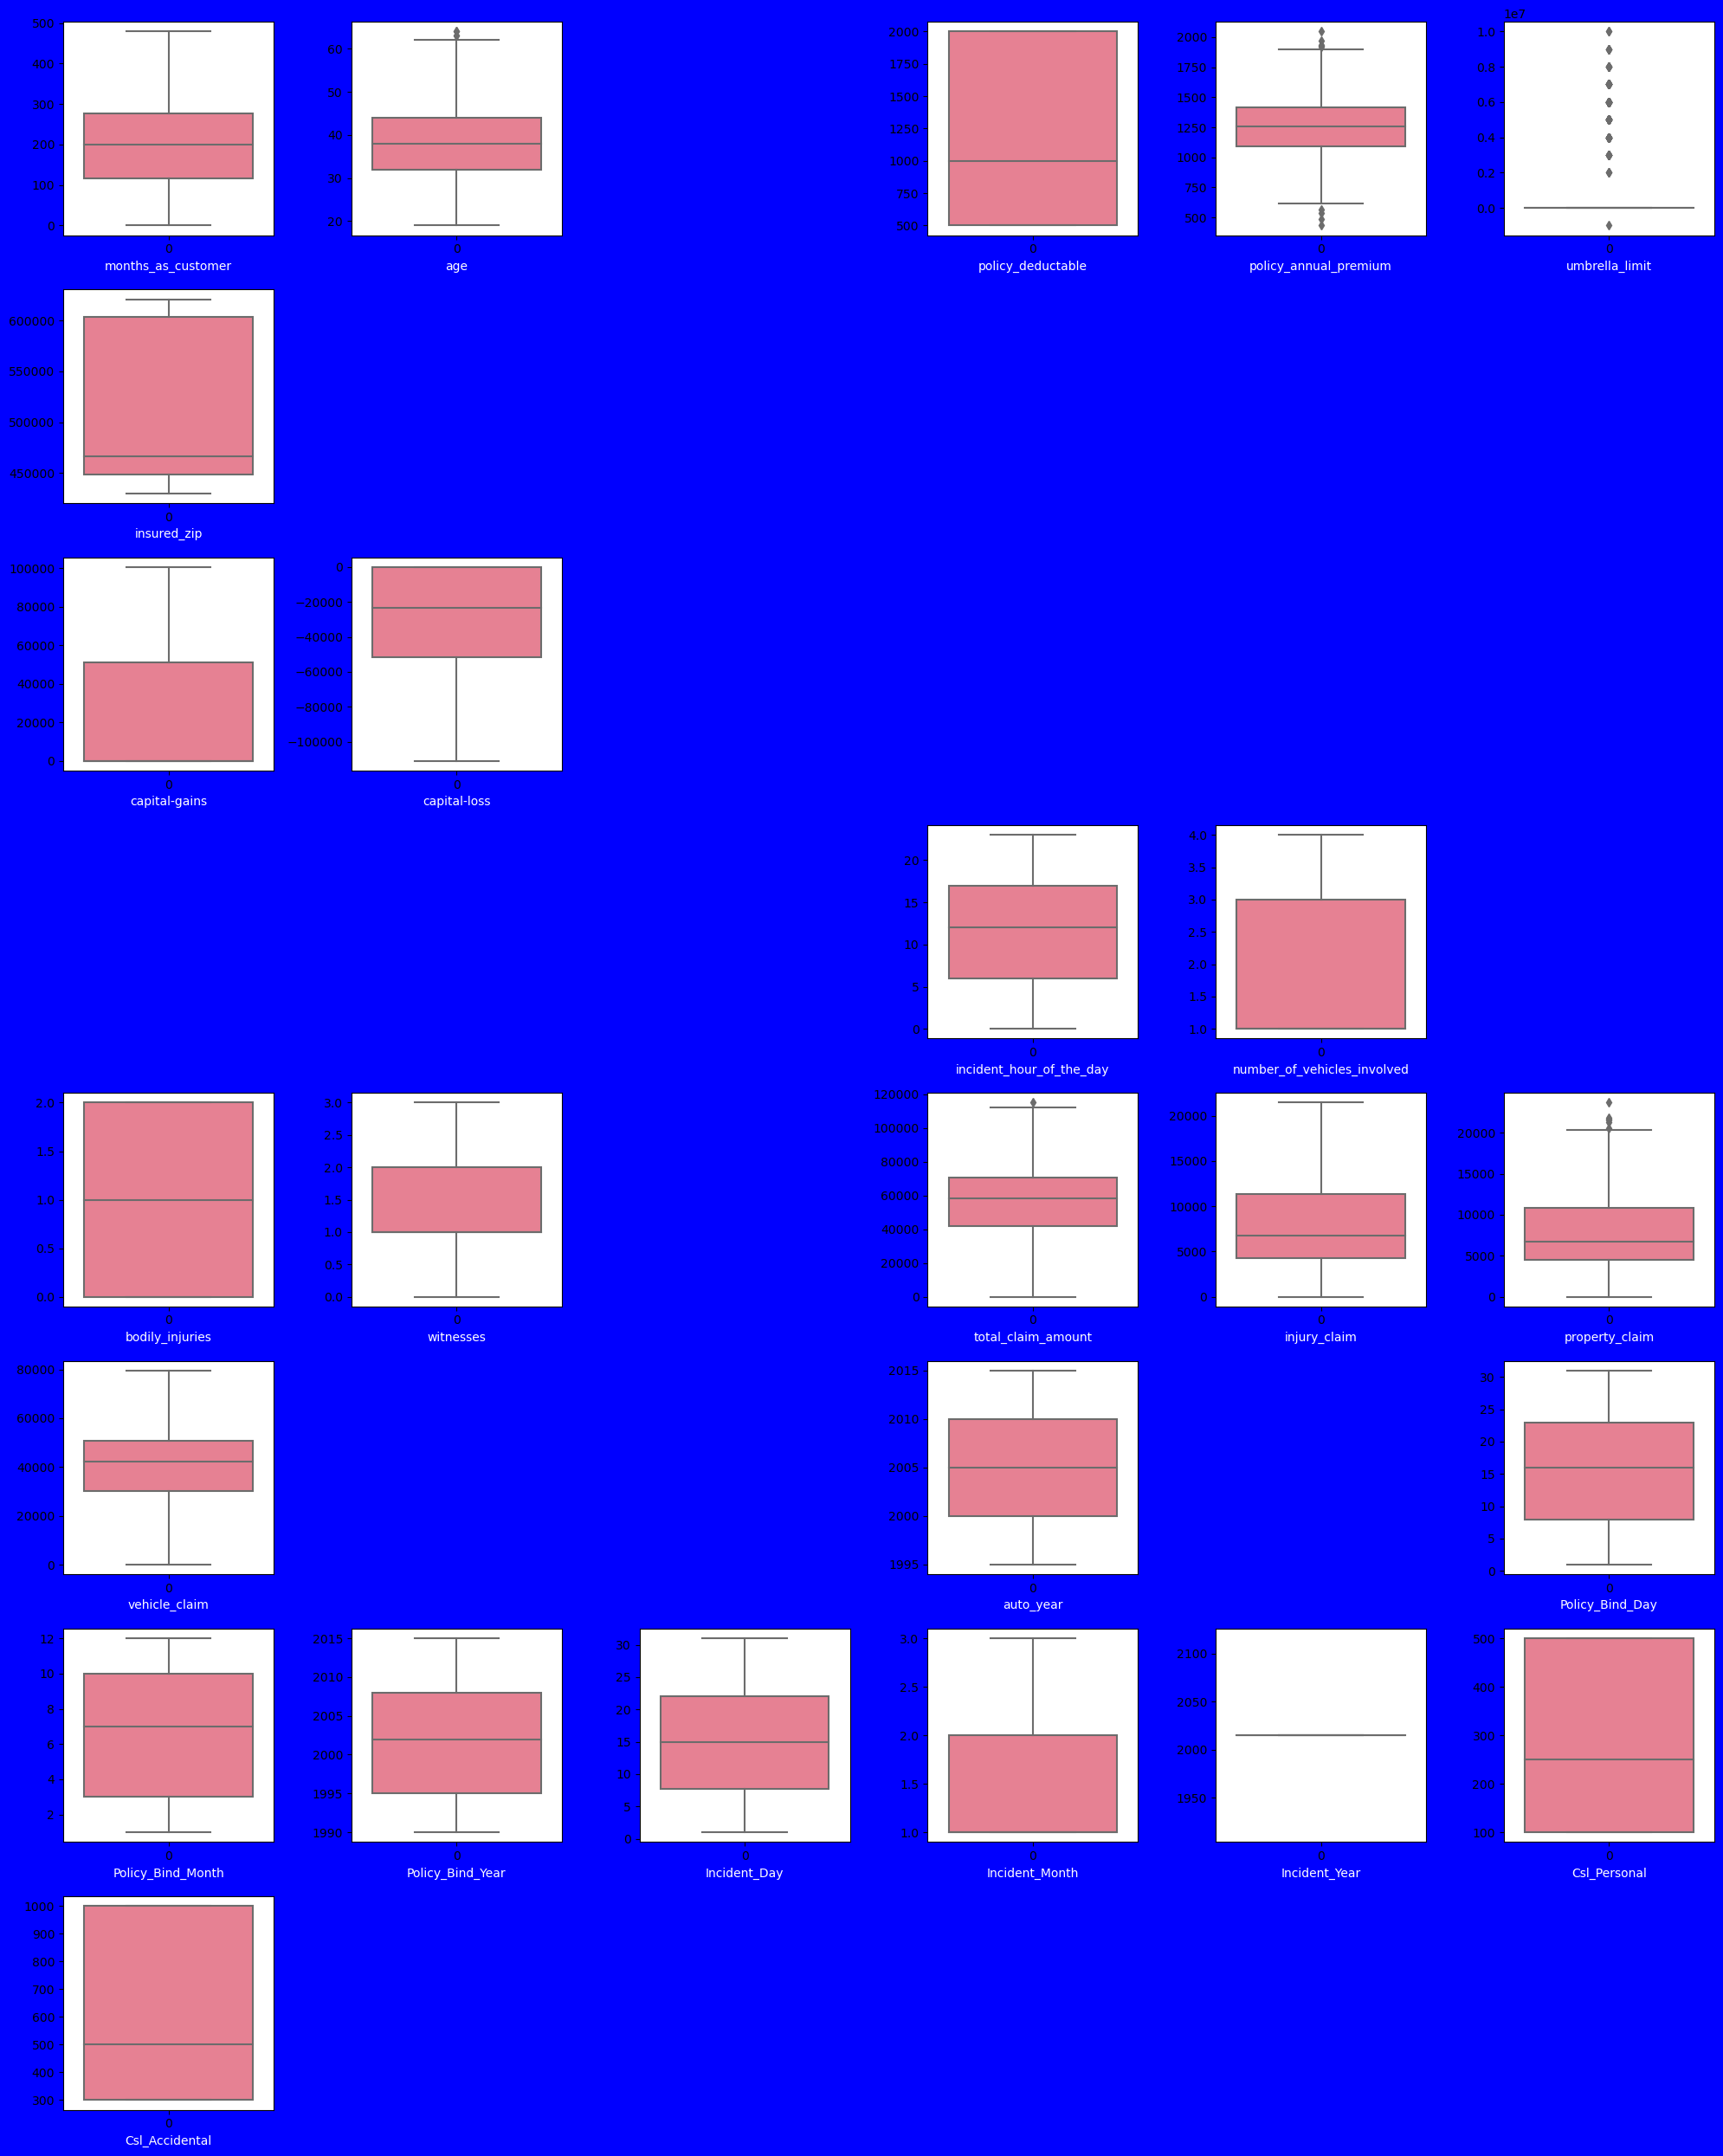

In [161]:
plt.figure(figsize = (20,25), facecolor = "blue")
plotnumber = 1

for column in df:
    if plotnumber<=len(df.columns) and df[column].dtype !="object":
        axs = plt.subplot(8,6,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 10,color = "white")
    plotnumber +=1
plt.show()

<b> From Boxplot We Can See Outliers Exist Dataset.</b>

In [162]:
#Droping The Outliers USing ZStats
from scipy.stats import zscore
z_score = zscore(df[["policy_annual_premium","umbrella_limit","property_claim"]])
abs_z_score = np.abs(z_score)
filtering = (abs_z_score<3).all(axis = 1)
df =df[filtering]
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,Policy_Bind_Day,Policy_Bind_Month,Policy_Bind_Year,Incident_Day,Incident_Month,Incident_Year,Csl_Personal,Csl_Accidental
count,981.000000,981.000000,981.000000,981.000000,9.810000e+02,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.0,981.000000,981.000000
mean,204.594292,38.972477,1138.124363,1257.298359,9.908257e+05,500596.322120,25344.648318,-26778.491335,11.677880,1.835882,0.998981,1.483180,52714.525994,7431.213048,7391.182467,37892.130479,2005.123344,15.432212,6.593272,2001.571865,14.982671,1.499490,2015.0,271.661570,578.491335
std,115.362802,9.179406,611.567198,241.462236,2.120098e+06,71369.824051,27961.064117,28067.248619,6.971239,1.018491,0.817537,1.112532,26336.821731,4885.814228,4793.177084,18839.979463,6.019871,8.828684,3.504911,7.390575,8.661945,0.524161,0.0,161.473419,287.061408
min,0.000000,19.000000,500.000000,538.170000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000,1.000000,1.000000,1990.000000,1.000000,1.000000,2015.0,100.000000,300.000000
25%,116.000000,32.000000,500.000000,1088.340000,0.000000e+00,448436.000000,0.000000,-51400.000000,6.000000,1.000000,0.000000,0.000000,41700.000000,4280.000000,4490.000000,30240.000000,2000.000000,7.000000,4.000000,1995.000000,7.000000,1.000000,2015.0,100.000000,300.000000
50%,200.000000,38.000000,1000.000000,1257.360000,0.000000e+00,466390.000000,0.000000,-24100.000000,12.000000,1.000000,1.000000,1.000000,57900.000000,6770.000000,6750.000000,42080.000000,2005.000000,16.000000,7.000000,2002.000000,15.000000,1.000000,2015.0,250.000000,500.000000
75%,278.000000,44.000000,2000.000000,1415.740000,0.000000e+00,602942.000000,51100.000000,0.000000,17.000000,3.000000,2.000000,2.000000,70500.000000,11280.000000,10860.000000,50720.000000,2010.000000,23.000000,10.000000,2008.000000,22.000000,2.000000,2015.0,500.000000,1000.000000
max,479.000000,64.000000,2000.000000,1969.630000,7.000000e+06,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,21810.000000,79560.000000,2015.000000,31.000000,12.000000,2015.000000,31.000000,3.000000,2015.0,500.000000,1000.000000


In [163]:
#Droping The Outliers USing ZStats
from scipy.stats import zscore
z_score = zscore(df[["policy_annual_premium","umbrella_limit","property_claim"]])
abs_z_score = np.abs(z_score)
filtering = (abs_z_score<3).all(axis = 1)
df =df[filtering]
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,Policy_Bind_Day,Policy_Bind_Month,Policy_Bind_Year,Incident_Day,Incident_Month,Incident_Year,Csl_Personal,Csl_Accidental
count,980.000000,980.000000,980.000000,980.000000,9.800000e+02,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.0,980.000000,980.000000
mean,204.759184,38.968367,1138.775510,1257.233980,9.918367e+05,500489.929592,25370.510204,-26805.816327,11.673469,1.836735,0.997959,1.483673,52686.714286,7431.377551,7376.469388,37878.867347,2005.132653,15.440816,6.588776,2001.576531,14.978571,1.500000,2015.0,271.428571,578.061224
std,115.305984,9.183190,611.539134,241.577102,2.120943e+06,71328.388833,27963.599529,28068.521455,6.973429,1.018660,0.817328,1.112993,26335.852290,4888.306182,4773.409193,18845.016320,6.015876,8.829075,3.503869,7.392903,8.665416,0.524185,0.0,161.390789,286.891544
min,0.000000,19.000000,500.000000,538.170000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000,1.000000,1.000000,1990.000000,1.000000,1.000000,2015.0,100.000000,300.000000
25%,116.750000,32.000000,500.000000,1087.875000,0.000000e+00,448404.500000,0.000000,-51425.000000,6.000000,1.000000,0.000000,0.000000,41697.500000,4277.500000,4480.000000,30220.000000,2000.000000,7.750000,4.000000,1995.000000,7.000000,1.000000,2015.0,100.000000,300.000000
50%,200.000000,38.000000,1000.000000,1257.200000,0.000000e+00,466346.500000,0.000000,-24200.000000,12.000000,1.000000,1.000000,1.000000,57880.000000,6760.000000,6745.000000,42080.000000,2005.000000,16.000000,7.000000,2002.000000,15.000000,1.000000,2015.0,250.000000,500.000000
75%,278.000000,44.250000,2000.000000,1415.825000,0.000000e+00,602867.000000,51150.000000,0.000000,17.250000,3.000000,2.000000,2.000000,70425.000000,11285.000000,10860.000000,50690.000000,2010.000000,23.000000,10.000000,2008.000000,22.000000,2.000000,2015.0,500.000000,1000.000000
max,479.000000,64.000000,2000.000000,1969.630000,7.000000e+06,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,21630.000000,79560.000000,2015.000000,31.000000,12.000000,2015.000000,31.000000,3.000000,2015.0,500.000000,1000.000000


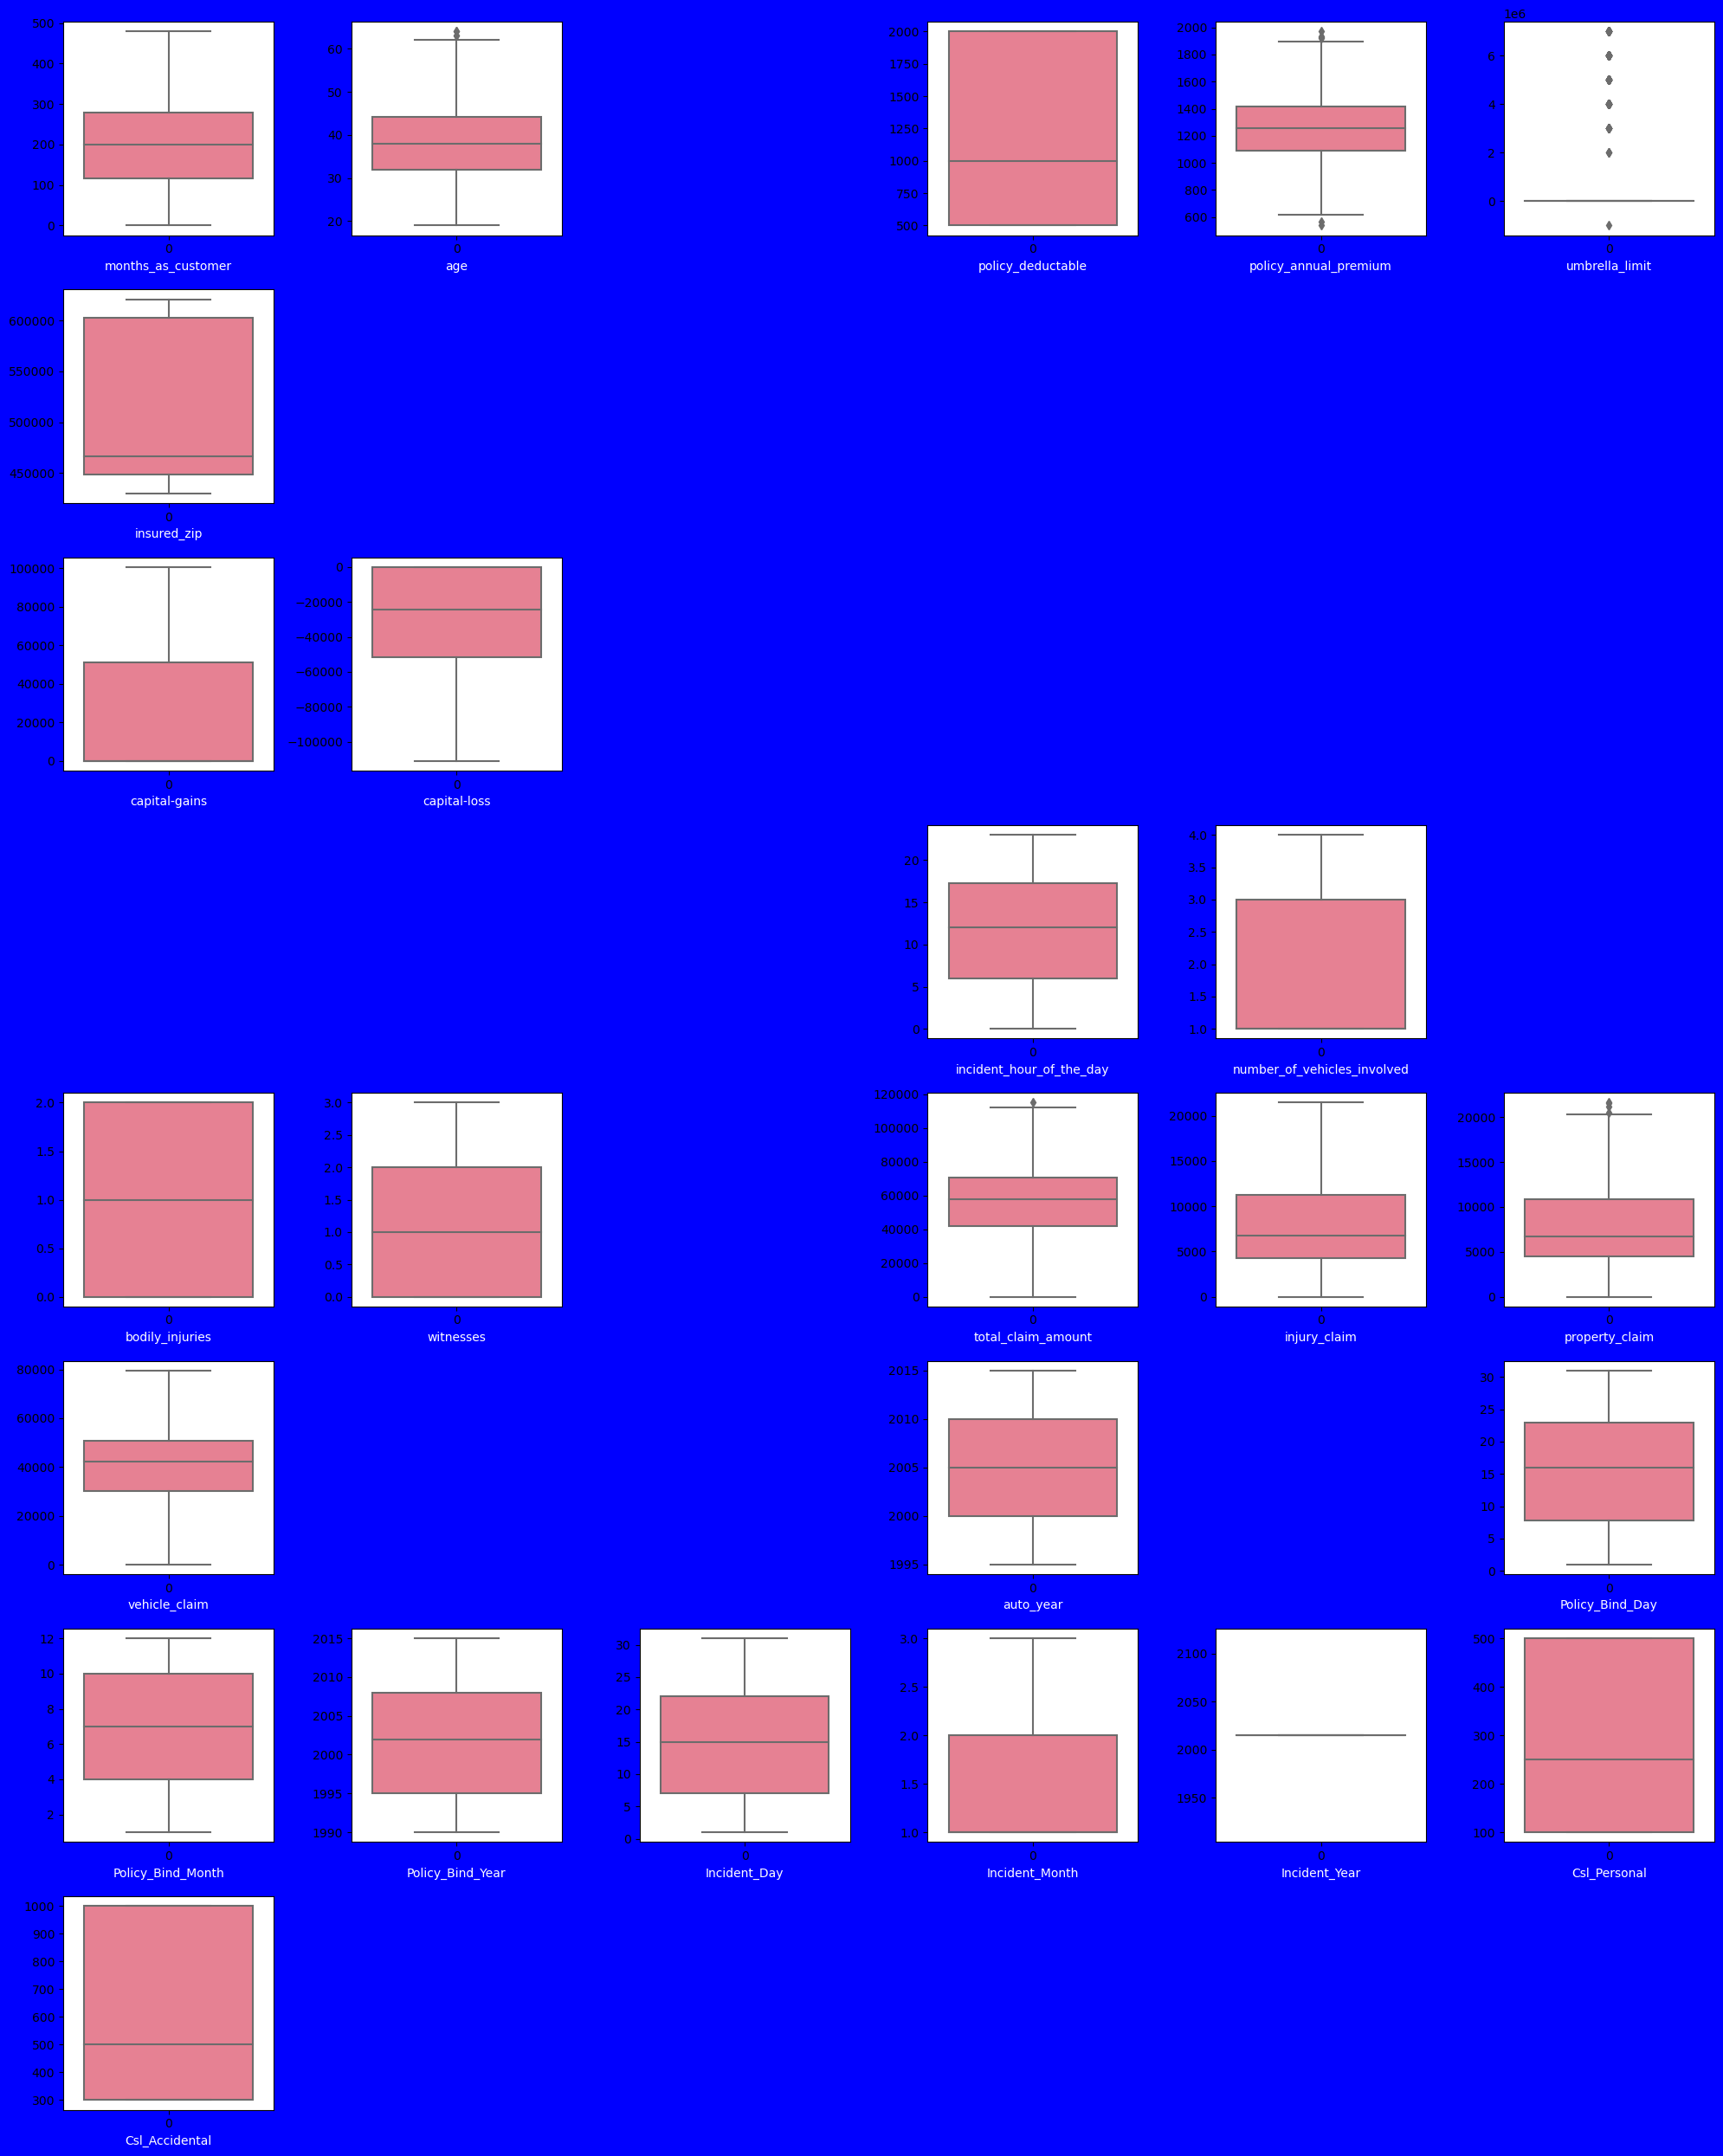

In [164]:
plt.figure(figsize = (20,25), facecolor = "blue")
plotnumber = 1

for column in df:
    if plotnumber<=len(df.columns) and df[column].dtype !="object":
        axs = plt.subplot(8,6,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize = 10,color = "white")
    plotnumber +=1
plt.show()

In [165]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtype =="object":
        df[i]= le.fit_transform(df[i])

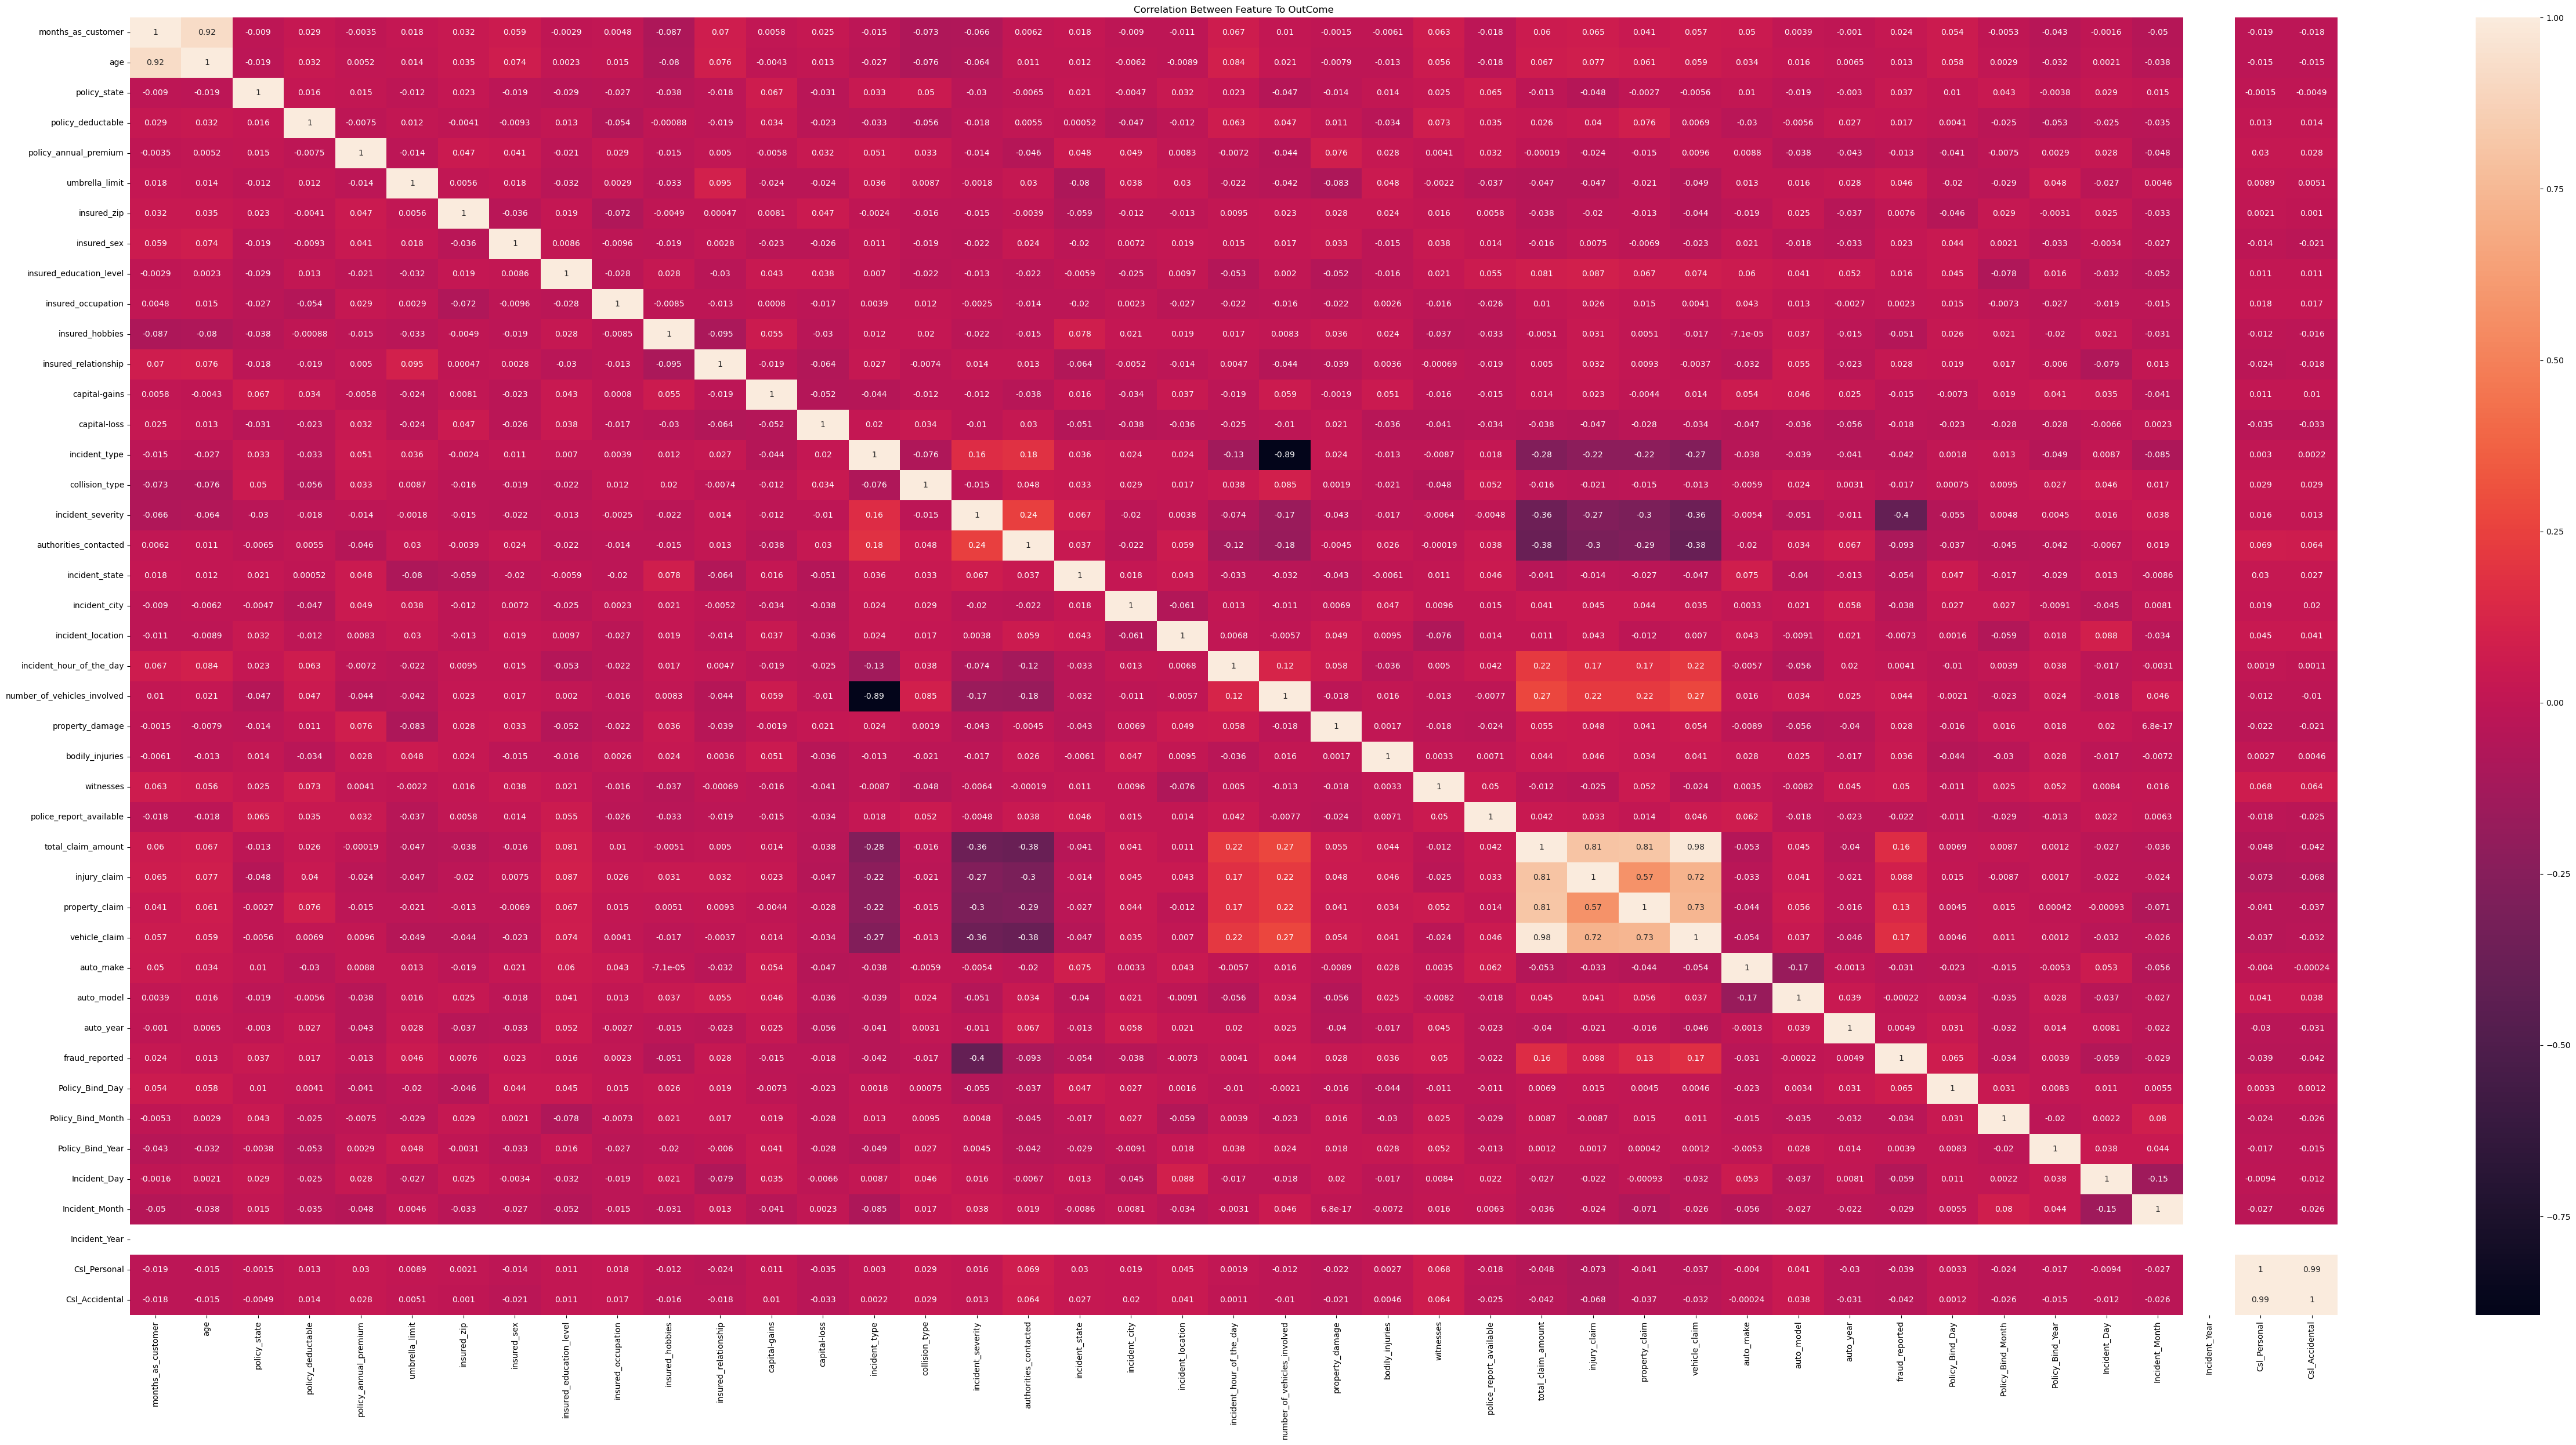

In [166]:
plt.figure(figsize = (50,25))
sns.heatmap(df.corr(),annot = True)
plt.title("Correlation Between Feature To OutCome")
plt.show()

<Axes: >

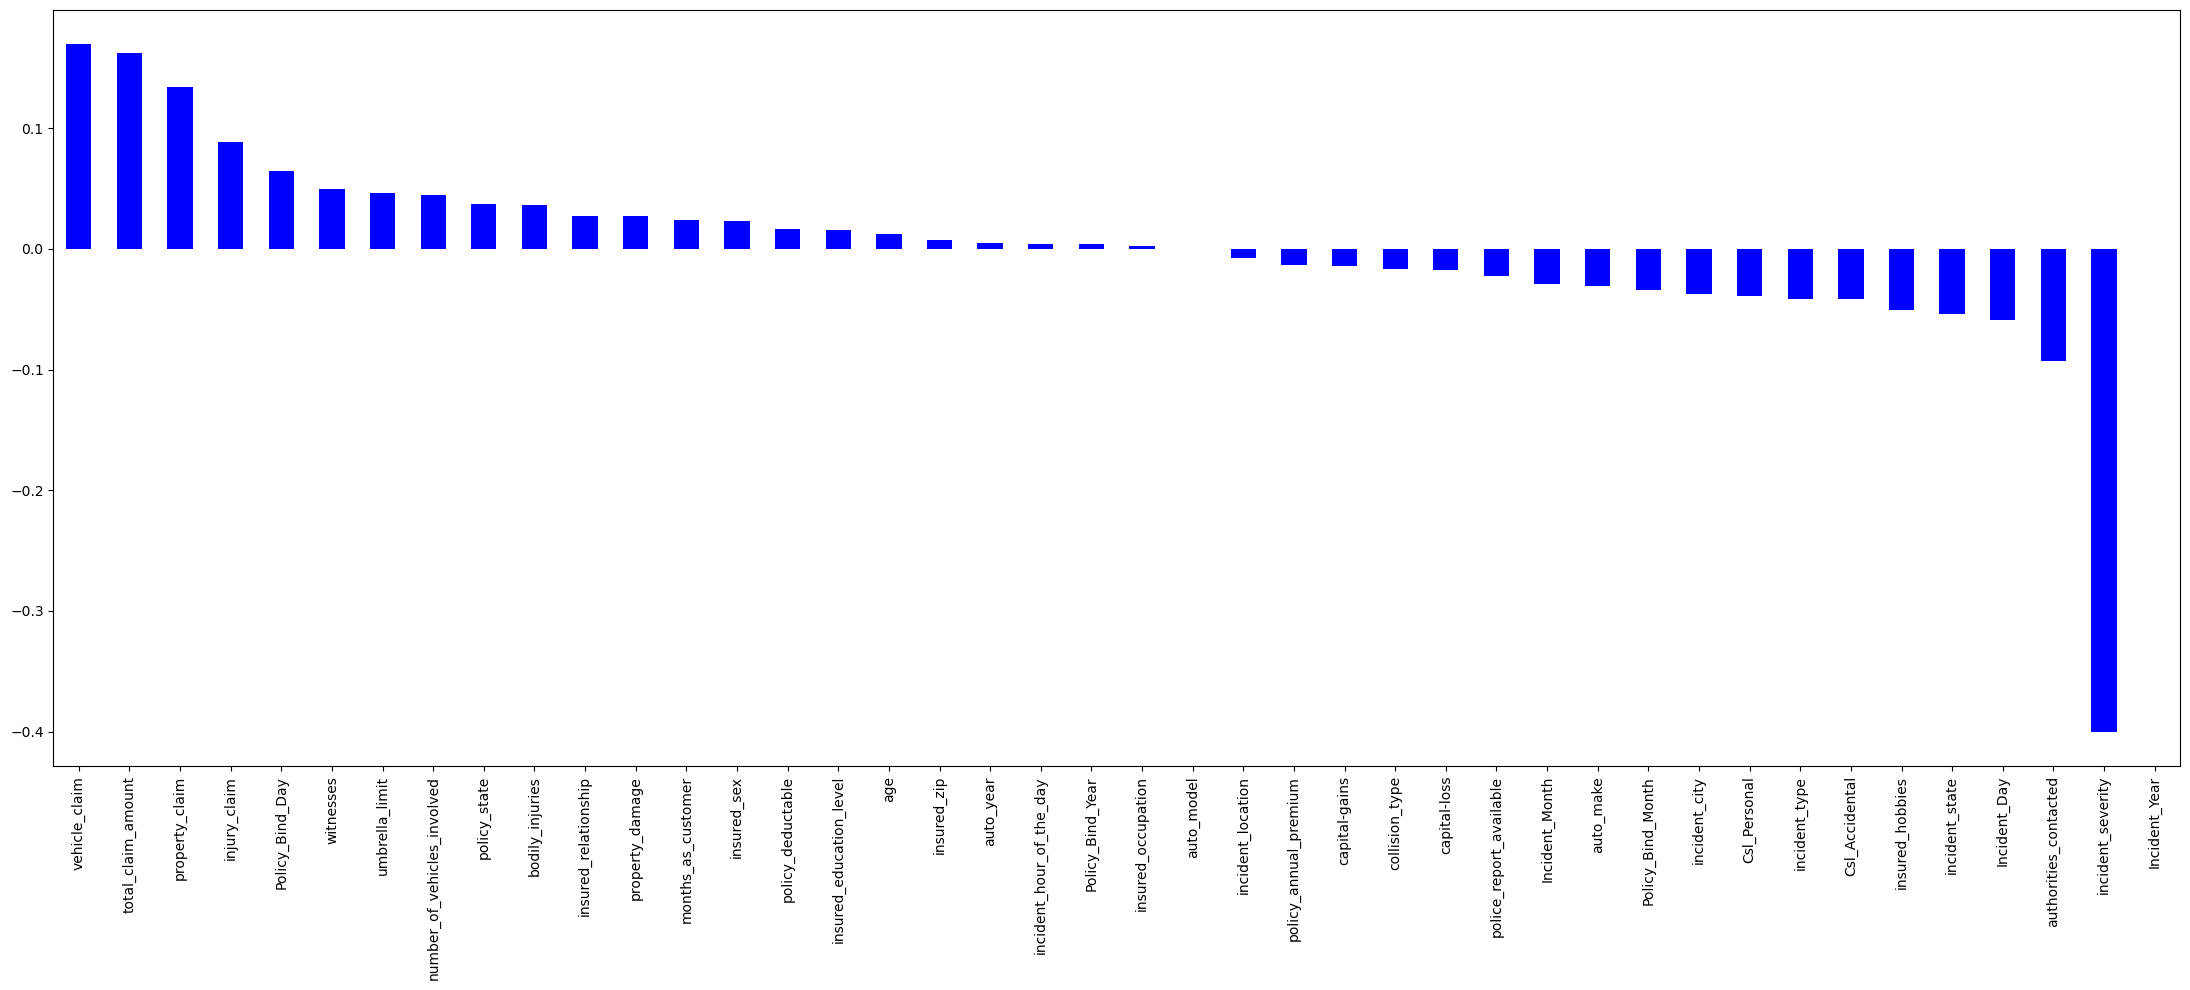

In [167]:
plt.figure(figsize=(22,10))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='b')

#### Observation:
- **Incident_Severity Is Correlated With Target Variable With Correlation Of 0.4. Other Variable Are Poorly Correlated With Target Variable.**
- Other Variable Are Poorly Correlated With Target Variable.
- injury_claim,property_claim,vehicle_claim Are Highly Correlated With Each Other.
- **Incident_Hour_Of_The_Day Is Highly Negative Correlated With incident type.**

In [168]:
y = df['fraud_reported']
X = df.drop(columns = 'fraud_reported')

In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [170]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame({"Features":X.columns,"Vif":[variance_inflation_factor(X,i) for i in range(X.shape[1])]})
vif

,Features,Vif
0,months_as_customer,7.053170
1,age,7.067387
2,policy_state,1.033879
3,policy_deductable,1.048013
4,policy_annual_premium,1.040032
5,umbrella_limit,1.046135
6,insured_zip,1.035162
7,insured_sex,1.036334
8,insured_education_level,1.055484
9,insured_occupation,1.024162


In [171]:
from sklearn.feature_selection import SelectKBest,f_classif
best_f = SelectKBest(score_func = f_classif, k=35)
fit = best_f.fit(X,y)
selected_ind = fit.get_support(indices = True)
selected_features = X.columns[selected_ind]
print(selected_features)

Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_make', 'Policy_Bind_Day', 'Policy_Bind_Month', 'Incident_Day',
       'Incident_Month', 'Csl_Personal', 'Csl_Accidental'],
      dtype='object')


In [172]:
X =X[['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_make', 'Policy_Bind_Day', 'Policy_Bind_Month', 'Incident_Day',
       'Incident_Month', 'Csl_Personal', 'Csl_Accidental']]

In [173]:
X

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,Policy_Bind_Day,Policy_Bind_Month,Incident_Day,Incident_Month,Csl_Personal,Csl_Accidental
0,1.069361,0.983998,1.179501,-0.227044,0.619895,-0.467878,-0.481933,1.071971,0.531957,1.279010,-1.438941,0.999290,0.955501,0.763169,1.345272,-1.262032,1.066427,0.353537,-0.976747,-0.821826,1.512809,0.002498,0.464145,1.473608,0.718904,-0.188582,1.182889,0.753960,0.852404,0.176687,0.974057,1.157076,-0.954348,-0.132842,-0.272232
1,0.201661,0.330297,-0.025828,1.409009,-0.248553,1.890767,-0.453262,1.071971,0.531957,0.927071,-0.249934,-0.907732,0.955501,1.688796,-0.029459,-0.196751,1.066427,0.817347,0.987772,-0.821826,-0.661022,-1.221626,-1.333729,-0.678606,-1.808980,-1.361366,-1.382626,-1.824695,0.356202,1.309886,-0.168122,0.695235,-0.954348,-0.132842,-0.272232
2,-0.613978,-1.086056,1.179501,1.409009,0.645697,1.890767,-0.979885,-0.932861,1.557164,-1.360530,0.344569,0.348112,0.955501,-1.088083,-0.029459,-0.196751,1.066427,-1.037893,-0.976747,1.142539,-0.661022,1.226623,1.363082,-0.678606,-0.685223,0.054980,-0.739151,-0.784633,-0.636202,-1.069833,0.688512,0.810696,0.954348,-1.062738,-0.969716
3,0.444617,0.221347,-1.231158,1.409009,0.656465,2.362496,1.509666,-0.932861,1.557164,-1.360530,0.939073,0.841862,-1.268765,0.763169,-1.404189,-1.262032,1.066427,-0.574083,-1.467877,-0.821826,-0.661022,0.002498,0.464145,-0.678606,0.407002,-0.223377,-0.217245,0.681755,-0.884303,1.083246,-0.453666,-0.574827,-0.954348,-0.132842,-0.272232
4,0.201661,0.548198,-1.231158,-0.227044,1.352954,2.362496,1.545981,1.071971,-1.518458,-1.360530,0.939073,1.453684,-0.684182,1.688796,-0.029459,-0.196751,1.066427,-1.037893,-1.467877,-0.821826,-0.661022,-1.221626,-0.434792,-0.678606,-1.754654,-1.254935,-1.409874,-1.769480,-1.628606,-1.069833,-0.168122,0.233395,0.954348,1.416984,1.471477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,-1.750665,-0.105504,1.179501,-0.227044,0.221848,-0.467878,-0.970669,-0.932861,1.044561,0.575132,0.939073,-0.907732,0.955501,0.763169,-1.404189,-0.196751,-0.662437,-1.501703,0.496642,-0.821826,1.512809,-1.221626,-0.434792,-0.678606,1.311175,2.048508,0.281605,1.229660,-0.140000,0.063367,0.117423,0.810696,0.954348,1.416984,1.471477
976,0.696250,0.221347,-1.231158,-0.227044,0.743645,-0.467878,1.510507,-0.932861,1.557164,1.279010,1.533576,1.629001,0.955501,0.763169,-0.029459,-1.262032,-0.662437,0.353537,0.005513,-0.821826,1.512809,1.226623,1.363082,-0.678606,2.119611,2.179499,2.243469,1.828532,1.596707,-1.183153,-1.595844,1.041616,-0.954348,-1.062738,-0.969716
977,-0.648686,-0.541305,1.179501,-1.045071,0.522899,0.947309,-0.809248,-0.932861,1.044561,-1.184561,-0.249934,0.348112,0.955501,-1.088083,1.345272,-0.196751,1.066427,-1.501703,-1.467877,1.142539,-0.661022,1.226623,1.363082,1.473608,0.562763,0.014045,0.025892,0.776258,1.100505,0.176687,-1.310300,0.926156,-0.954348,-0.132842,-0.272232
978,2.197372,2.509302,-1.231158,1.409009,0.412858,1.890767,-0.824439,1.071971,-1.518458,-1.712469,1.533576,-0.907732,0.955501,0.763169,-0.029459,-1.262032,0.201995,-1.037893,-1.467877,-0.821826,-0.661022,-1.221626,-0.434792,1.473608,-0.216801,-0.452612,-0.451998,-0.071083,-1.380505,0.290007,1.259601,1.272536,0.954348,1.416984,1.471477


#####  Imbalance Data Set

In [174]:
y.value_counts()

fraud_reported
0    741
1    239
Name: count, dtype: int64

##### Balance Data Set Using SMOTE

In [175]:
from imblearn.over_sampling import SMOTE
sm =SMOTE()
X,y = sm.fit_resample(X,y)
y.value_counts()

fraud_reported
1    741
0    741
Name: count, dtype: int64

In [176]:
X.describe()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,Policy_Bind_Day,Policy_Bind_Month,Incident_Day,Incident_Month,Csl_Personal,Csl_Accidental
count,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000
mean,0.009602,0.000575,0.029065,-0.020914,-0.009664,-0.007660,0.002512,0.017816,0.007427,-0.028563,0.029996,0.000685,0.023233,-0.022863,-0.005007,-0.253686,-0.071439,-0.021430,-0.053491,0.028175,0.001383,-0.000858,0.035488,-0.024963,0.077631,0.038566,0.048190,0.086279,-0.037874,0.056311,-0.030746,-0.044994,-0.027479,-0.025482,-0.030831
std,0.970609,0.973803,0.953546,0.959274,0.955295,0.959294,0.947980,0.964876,0.961961,0.955951,0.974182,0.969535,0.951396,0.971082,0.960049,0.990948,0.952207,0.937688,0.955463,0.995198,0.963452,0.951711,0.961799,0.952053,0.922519,0.946242,0.941338,0.925798,0.950066,0.968361,0.954089,0.962396,0.961102,0.958520,0.959182
min,-1.776696,-2.175558,-1.231158,-1.045071,-2.978060,-0.939607,-0.987291,-0.932861,-1.518458,-1.712469,-1.438941,-0.907732,-3.004691,-1.088083,-1.404189,-1.262032,-1.526869,-1.501703,-1.467877,-0.821826,-0.661022,-1.221626,-1.333729,-0.678606,-1.997792,-1.521012,-1.546114,-2.007330,-1.628606,-1.636433,-1.595844,-1.613969,-0.954348,-1.062738,-0.969716
25%,-0.718102,-0.759205,-1.231158,-1.045071,-0.687414,-0.467878,-0.673893,-0.932861,-0.766238,-0.832622,-0.844438,-0.907732,-0.813813,-1.088083,-0.643948,-1.262032,-0.662437,-1.037893,-0.976747,-0.821826,-0.661022,-1.221626,-0.444548,-0.678606,-0.246433,-0.536411,-0.481342,-0.233135,-0.884303,-0.751015,-0.789032,-0.824104,-0.954348,-1.062738,-0.969716
50%,-0.041434,-0.105504,-0.025828,-0.227044,0.018600,-0.467878,-0.454763,-0.431433,0.019353,-0.005413,-0.091089,-0.362718,0.164249,0.232393,-0.029459,-0.196751,0.201995,0.353537,0.005513,-0.821826,-0.661022,0.002498,0.198267,-0.678606,0.242504,-0.085180,-0.078908,0.276080,-0.140000,0.063367,-0.003141,-0.112986,-0.447520,-0.132842,-0.272232
75%,0.624894,0.548198,1.179501,1.369671,0.598154,-0.467878,1.325744,1.071971,0.899708,0.751102,0.939073,0.895531,0.955501,0.763169,0.875216,0.868530,1.066427,0.817347,0.884732,1.142539,1.512809,1.226623,0.759114,1.473608,0.681356,0.763153,0.683853,0.683348,0.852404,0.894158,0.710185,0.754655,0.954348,1.416984,1.471477
max,2.379589,2.727202,1.179501,1.409009,2.950444,2.834225,1.689840,1.071971,1.557164,1.630949,1.533576,2.688061,0.955501,1.688796,1.345272,1.933811,1.066427,1.281157,1.478902,2.124722,1.512809,1.226623,1.363082,1.473608,2.364270,2.869252,2.987552,2.212915,1.596707,1.763166,1.545146,1.849837,2.863045,1.416984,1.471477


#### Classification Model 

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [191]:
#Finding Best Random State
max_accuracy = 0
best_rm = 0
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = i)
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    y_pred = dtc.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_rm = i
print("Maximum Accuracy Score:-",max_accuracy,"In This Random State",best_rm)

Maximum Accuracy Score:- 0.8853932584269663 In This Random State 180


In [192]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = best_rm)

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve,classification_report
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
lr_train_pred = lr.predict(x_train)
print("Training Accuracy Score:-",accuracy_score(y_train,lr_train_pred))
print("Accuracy Score:-",accuracy_score(y_test,lr_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,lr_pred))
print("Classification Report:-",classification_report(y_test,lr_pred))

Training Accuracy Score:- 0.7579556412729026
Accuracy Score:- 0.7123595505617978
Confusion Matrix:- [[145  76]
 [ 52 172]]
Classification Report:-               precision    recall  f1-score   support

           0       0.74      0.66      0.69       221
           1       0.69      0.77      0.73       224

    accuracy                           0.71       445
   macro avg       0.71      0.71      0.71       445
weighted avg       0.71      0.71      0.71       445



In [194]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr,x_train,y_train,cv = 5)
print(score)
print(score.mean())
print("Difference Between Accuracy Score And Cross Validation Score Is :-",accuracy_score(y_test,lr_pred)-score.mean())

[0.74038462 0.75       0.74396135 0.75362319 0.73913043]
0.7454199182460052
Difference Between Accuracy Score And Cross Validation Score Is :- -0.03306036768420739


In [195]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
dtc_train_pred = dtc.predict(x_train)
print("Training Accuracy Score:-",accuracy_score(y_train,dtc_train_pred))
print("Accuracy Score:-",accuracy_score(y_test,dtc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,dtc_pred))
print("Classification Report:-",classification_report(y_test,dtc_pred))

Training Accuracy Score:- 1.0
Accuracy Score:- 0.8629213483146068
Confusion Matrix:- [[192  29]
 [ 32 192]]
Classification Report:-               precision    recall  f1-score   support

           0       0.86      0.87      0.86       221
           1       0.87      0.86      0.86       224

    accuracy                           0.86       445
   macro avg       0.86      0.86      0.86       445
weighted avg       0.86      0.86      0.86       445



In [196]:
score1 = cross_val_score(dtc,x_train,y_train,cv = 5)
print(score1)
print(score1.mean())
print("Difference Between Accuracy Score And Cross Validation Score Is :-",accuracy_score(y_test,dtc_pred)-score1.mean())

[0.82692308 0.84615385 0.84541063 0.84057971 0.84541063]
0.8408955778520996
Difference Between Accuracy Score And Cross Validation Score Is :- 0.0220257704625072


In [197]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
rfc_train_pred = rfc.predict(x_train)
print("Training Accuracy Score:-",accuracy_score(y_train,rfc_train_pred))
print("Accuracy Score:-",accuracy_score(y_test,rfc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,rfc_pred))
print("Classification Report:-",classification_report(y_test,rfc_pred))

Training Accuracy Score:- 1.0
Accuracy Score:- 0.8853932584269663
Confusion Matrix:- [[197  24]
 [ 27 197]]
Classification Report:-               precision    recall  f1-score   support

           0       0.88      0.89      0.89       221
           1       0.89      0.88      0.89       224

    accuracy                           0.89       445
   macro avg       0.89      0.89      0.89       445
weighted avg       0.89      0.89      0.89       445



In [198]:
score2 = cross_val_score(rfc,x_train,y_train,cv = 5)
print(score2)
print(score2.mean())
print("Difference Between Accuracy Score And Cross Validation Score Is :-",accuracy_score(y_test,rfc_pred)-score2.mean())

[0.86538462 0.88461538 0.90821256 0.90338164 0.87439614]
0.8871980676328504
Difference Between Accuracy Score And Cross Validation Score Is :- -0.0018048092058841059


In [199]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
etc_pred = etc.predict(x_test)
etc_train_pred = etc.predict(x_train)
print("Training Accuracy Score:-",accuracy_score(y_train,etc_train_pred))
print("Accuracy Score:-",accuracy_score(y_test,etc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,etc_pred))
print("Classification Report:-",classification_report(y_test,etc_pred))

Training Accuracy Score:- 1.0
Accuracy Score:- 0.898876404494382
Confusion Matrix:- [[195  26]
 [ 19 205]]
Classification Report:-               precision    recall  f1-score   support

           0       0.91      0.88      0.90       221
           1       0.89      0.92      0.90       224

    accuracy                           0.90       445
   macro avg       0.90      0.90      0.90       445
weighted avg       0.90      0.90      0.90       445



In [200]:
score3 = cross_val_score(etc,x_train,y_train,cv = 5)
print(score3)
print(score3.mean())
print("Difference Between Accuracy Score And Cross Validation Score Is :-",accuracy_score(y_test,etc_pred)-score3.mean())

[0.89903846 0.91826923 0.92270531 0.89855072 0.88888889]
0.9054905239687848
Difference Between Accuracy Score And Cross Validation Score Is :- -0.006614119474402824


In [201]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
svc_train_pred = svc.predict(x_train)
print("Training Accuracy Score:-",accuracy_score(y_train,svc_train_pred))
print("Accuracy Score:-",accuracy_score(y_test,svc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,svc_pred))
print("Classification Report:-",classification_report(y_test,svc_pred))

Training Accuracy Score:- 0.9566055930568949
Accuracy Score:- 0.8426966292134831
Confusion Matrix:- [[180  41]
 [ 29 195]]
Classification Report:-               precision    recall  f1-score   support

           0       0.86      0.81      0.84       221
           1       0.83      0.87      0.85       224

    accuracy                           0.84       445
   macro avg       0.84      0.84      0.84       445
weighted avg       0.84      0.84      0.84       445



In [202]:
score4 = cross_val_score(svc,x_train,y_train,cv = 5)
print(score4)
print(score4.mean())
print("Difference Between Accuracy Score And Cross Validation Score Is :-",accuracy_score(y_test,svc_pred)-score4.mean())

[0.84134615 0.83653846 0.84057971 0.88888889 0.85507246]
0.8524851356373094
Difference Between Accuracy Score And Cross Validation Score Is :- -0.009788506423826338


In [203]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_test)
gbc_train_pred = gbc.predict(x_train)
print("Training Accuracy Score:-",accuracy_score(y_train,gbc_train_pred))
print("Accuracy Score:-",accuracy_score(y_test,gbc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,gbc_pred))
print("Classification Report:-",classification_report(y_test,gbc_pred))

Training Accuracy Score:- 0.9720347155255545
Accuracy Score:- 0.8876404494382022
Confusion Matrix:- [[194  27]
 [ 23 201]]
Classification Report:-               precision    recall  f1-score   support

           0       0.89      0.88      0.89       221
           1       0.88      0.90      0.89       224

    accuracy                           0.89       445
   macro avg       0.89      0.89      0.89       445
weighted avg       0.89      0.89      0.89       445



In [204]:
score5 = cross_val_score(gbc,x_train,y_train,cv = 5)
print(score5)
print(score5.mean())
print("Difference Between Accuracy Score And Cross Validation Score Is :-",accuracy_score(y_test,gbc_pred)-score5.mean())


[0.88461538 0.87980769 0.8647343  0.90821256 0.85507246]
0.8784884801189149
Difference Between Accuracy Score And Cross Validation Score Is :- 0.0091519693192873


In [205]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_pred = abc.predict(x_test)
abc_train_pred = abc.predict(x_train)
print("Training Accuracy Score:-",accuracy_score(y_train,abc_train_pred))
print("Accuracy Score:-",accuracy_score(y_test,abc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,abc_pred))
print("Classification Report:-",classification_report(y_test,abc_pred))

Training Accuracy Score:- 0.9103182256509161
Accuracy Score:- 0.8584269662921349
Confusion Matrix:- [[198  23]
 [ 40 184]]
Classification Report:-               precision    recall  f1-score   support

           0       0.83      0.90      0.86       221
           1       0.89      0.82      0.85       224

    accuracy                           0.86       445
   macro avg       0.86      0.86      0.86       445
weighted avg       0.86      0.86      0.86       445



In [206]:
score6 = cross_val_score(abc,x_train,y_train,cv = 5)
print(score6)
print(score6.mean())
print("Difference Between Accuracy Score And Cross Validation Score Is :-",accuracy_score(y_test,abc_pred)-score6.mean())

[0.83173077 0.86057692 0.87439614 0.90821256 0.82608696]
0.8602006688963211
Difference Between Accuracy Score And Cross Validation Score Is :- -0.0017737026041861892


In [207]:
from sklearn.ensemble import BaggingClassifier
bgc = BaggingClassifier()
bgc.fit(x_train,y_train)
bgc_pred = bgc.predict(x_test)
bgc_train_pred = bgc.predict(x_train)
print("Training Accuracy Score:-",accuracy_score(y_train,bgc_train_pred))
print("Accuracy Score:-",accuracy_score(y_test,bgc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,bgc_pred))
print("Classification Report:-",classification_report(y_test,bgc_pred))

Training Accuracy Score:- 0.9942140790742526
Accuracy Score:- 0.8719101123595505
Confusion Matrix:- [[192  29]
 [ 28 196]]
Classification Report:-               precision    recall  f1-score   support

           0       0.87      0.87      0.87       221
           1       0.87      0.88      0.87       224

    accuracy                           0.87       445
   macro avg       0.87      0.87      0.87       445
weighted avg       0.87      0.87      0.87       445



In [208]:
score7 = cross_val_score(bgc,x_train,y_train,cv = 5)
print(score7)
print(score7.mean())
print("Difference Between Accuracy Score And Cross Validation Score Is :-",accuracy_score(y_test,bgc_pred)-score7.mean())

[0.88942308 0.88461538 0.86956522 0.88888889 0.87439614]
0.8813777406168711
Difference Between Accuracy Score And Cross Validation Score Is :- -0.009467628257320615


### Our Best Module Is Extra Trees Classifier 

In [211]:
param_grid = {"n_estimators":[50,100,200,300,400],
             "criterion":['gini','entropy'],
             "max_depth":[10,20,30],
             "min_samples_split":[2,5,8,10],
             "max_features":['auto','sqrt','log2'],
             "bootstrap":[True,False]}

In [212]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator =etc,param_grid = param_grid, scoring ='accuracy',cv =5)

In [213]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 8, 10],
                         'n_estimators': [50, 100, 200, 300, 400]},
             scoring='accuracy')

In [221]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 400}

In [222]:
Final_Model = ExtraTreesClassifier(criterion='gini',max_depth = 30, max_features = 'sqrt',min_samples_split= 2,n_estimators = 400)
Final_Model.fit(x_train,y_train)
final_pred = Final_Model.predict(x_test)
acc = accuracy_score(y_test,final_pred)
print(acc*100)

90.78651685393258


In [223]:
confusion_matrix(y_test, final_pred)

array([[196,  25],
       [ 16, 208]], dtype=int64)

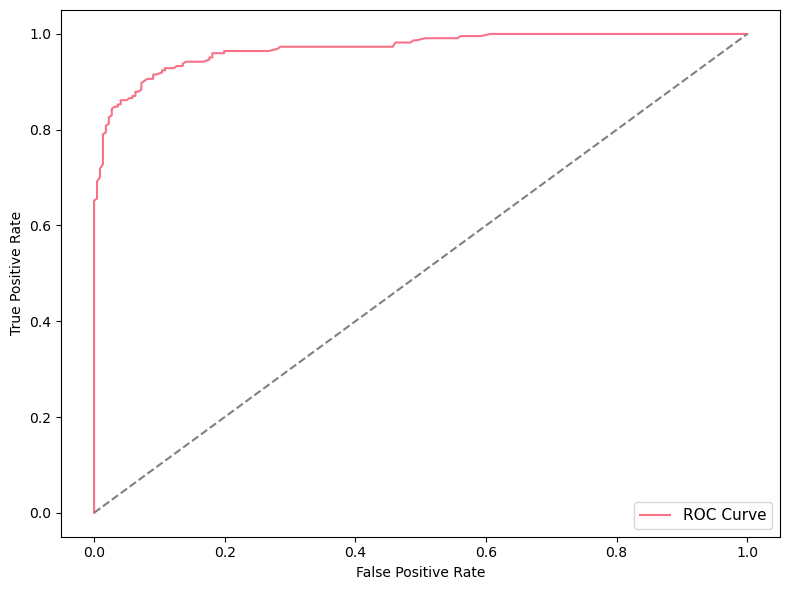

AUC Score: 0.969588316095669


In [224]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, Final_Model.predict_proba(x_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop={'size': 11}, loc='lower right')
plt.show()

# Calculate ROC AUC score
auc_score = roc_auc_score(y_test, Final_Model.predict_proba(x_test)[:, 1])
print("AUC Score:", auc_score)


In [225]:
import joblib
joblib.dump(Final_Model,"Insurance Claim Fraud Detection.pkl")

['Insurance Claim Fraud Detection.pkl']